In [34]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
pd.options.display.float_format = '{:,.3f}'.format

pd.options.mode.chained_assignment = None
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
#sns.set(rc={'figure.figsize':(10,10)})
import matplotlib
#matplotlib.use('agg')
#matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
#plt.rcParams.update(plt.rcParamsDefault)
new_plot_col=list(range(1800,2001,10))
from scipy.stats.stats import pearsonr
from scipy.stats.stats import pearsonr
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES
lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)
from functools import reduce

In [4]:
def lemma_maker(x, y):
    #print(lemmatizer(x,y)[0])
    return lemmatizer(x,y)[0]

In [6]:
br_to_us=pd.read_excel("../../Book.xlsx",skiprows=[0])
br_to_us_dict=dict(zip(br_to_us.UK.tolist(),br_to_us.US.tolist()))
spelling_replacement={'modifier':br_to_us_dict,'head':br_to_us_dict}

In [9]:
reddy11_study=pd.read_csv("../../MeanAndDeviations.clean.txt",sep="\t")
#print(reddy11_study.columns)
reddy11_study.columns=['compound','to_divide']
reddy11_study['modifier_mean'],reddy11_study['modifier_std'],reddy11_study['head_mean'],reddy11_study['head_std'],reddy11_study['compound_mean'],reddy11_study['compound_std'],_=reddy11_study.to_divide.str.split(" ",7).str
reddy11_study['modifier'],reddy11_study['head']=reddy11_study['compound'].str.split(" ",2).str
reddy11_study.modifier=reddy11_study.modifier.str[:-2]
reddy11_study['head']=reddy11_study['head'].str[:-2]
reddy11_study.drop(['compound','to_divide'],axis=1,inplace=True)
#reddy11_study['modifier']=np.vectorize(lemma_maker)(reddy11_study['modifier'],'n')
reddy11_study['head']=np.vectorize(lemma_maker)(reddy11_study['head'],'n')
reddy11_study.replace(spelling_replacement,inplace=True)
reddy11_study['modifier']=reddy11_study['modifier']+"_noun"
reddy11_study['head']=reddy11_study['head']+"_noun"
reddy11_study=reddy11_study.apply(pd.to_numeric, errors='ignore')
#reddy11_study.set_index(['modifier','head'],inplace=True)
reddy11_study

modifier_mean  modifier_std  head_mean  head_std  compound_mean  \
0           3.867         1.118      4.867     0.340          4.250   
1           1.607         1.655      1.893     1.496          1.704   
2           2.821         1.965      4.862     0.345          3.828   
3           4.767         0.423      4.862     0.345          4.800   
4           0.600         0.800      4.586     1.099          1.310   
5           2.679         1.691      3.933     1.181          3.786   
6           0.379         0.806      4.714     0.839          1.517   
7           0.429         0.776      5.000     0.000          2.643   
8           1.067         1.289      3.407     1.341          1.704   
9           4.714         0.589      0.862     0.937          2.185   
10          1.593         1.472      1.444     1.771          1.519   
11          3.107         1.372      2.862     1.358          3.333   
12          2.000         1.840      4.621     0.997          3.852   
13          1.400         1.083      5.000     0.000          3.038   
14          4.667         0.537      4.933     0.249          4.667   
15          4.815         0.772      0.517     1.038          2.448   
16          4.667         0.650      4.767     0.616          4.400   
17          2.931         1.507      4.517     1.071          4.000   
18          4.500         0.719      5.000     0.000          4.600   
19          4.667         0.544      0.414     0.766          2.276   
20          3.962         1.055      0.467     0.618          2.038   
21          4.222         1.066      0.370     0.728          1.556   
22          0.379         0.611      1.107     1.145          0.828   
23          0.667         1.011      1.852     1.297          0.724   
24          0.370         0.554      0.815     1.248          0.750   
25          0.714         0.749      1.000     0.943          0.714   
26          3.821         0.889      3.897     0.959          3.862   
27          0.759         0.625      4.607     0.859          1.250   
28          0.885         1.187      1.731     1.630          1.250   
29          4.655         0.957      4.345     0.800          4.467   
..            ...           ...        ...       ...            ...   
60          0.296         0.457      0.448     0.770          0.310   
61          3.655         1.123      4.667     0.471          3.700   
62          4.467         0.884      0.500     0.824          1.926   
63          0.778         0.916      3.889     1.397          1.690   
64          3.828         1.053      0.714     0.749          1.483   
65          0.786         0.977      0.500     0.866          0.778   
66          3.552         1.220      4.000     1.033          4.111   
67          4.414         1.067      3.308     2.071          3.897   
68          0.185         0.474      3.786     1.047          1.250   
69          0.250         0.509      2.036     1.322          0.857   
70          0.964         0.944      4.233     0.920          2.143   
71          0.643         0.972      1.552     1.404          1.429   
72          4.750         0.509      0.714     0.795          2.167   
73          1.036         0.823      4.897     0.305          2.320   
74          4.345         0.992      4.690     0.532          4.571   
75          4.862         0.345      5.000     0.000          4.931   
76          4.607         0.673      2.000     1.282          2.720   
77          3.733         1.948      3.867     1.979          3.724   
78          0.500         0.563      4.655     1.153          1.808   
79          4.900         0.300      4.533     0.957          4.821   
80          4.733         0.442      4.414     0.720          4.655   
81          0.379         0.611      4.500     0.719          1.519   
82          4.667         0.537      4.897     0.305          4.667   
83          2.300         1.595      4.000     0.830          2.893   
84          4.833         0.

In [10]:
compounds=pd.read_pickle("../../compounds_CompoundAware_10_50_300.pkl")

In [11]:
heads=pd.read_pickle("../../heads_CompoundAware_10_50_300.pkl")

In [12]:
modifiers=pd.read_pickle("../../modifiers_CompoundAware_10_50_300.pkl")

In [13]:
features=pd.read_csv("../../features_CompoundAware_10_50_300.csv", sep="\t")

In [26]:
lmi_cols = [col for col in features.columns if 'local_mi' in col]
llr_cols = [col for col in features.columns if 'log_ratio' in col]
ppmi_cols = [col for col in features.columns if 'ppmi' in col]
sim_bw_constituents_cols = [col for col in features.columns if 'sim_bw_constituents' in col]
sim_with_head_cols = [col for col in features.columns if 'sim_with_head' in col]
sim_with_modifier_cols = [col for col in features.columns if 'sim_with_modifier' in col]
#assert (len(lmi_cols)+len(llr_cols)+len(ppmi_cols)+len(sim_bw_constituents_cols)+len(sim_with_head_cols)+len(sim_with_modifier_cols))==(len(features.columns))

In [37]:
lmi_df=features.set_index(["modifier", "head"])[lmi_cols]
#lmi_df=lmi_df.pct_change(axis='columns')*100
lmi_df.columns=new_plot_col
plot_lmi_df=lmi_df.reset_index()
plot_lmi_df['compound']=plot_lmi_df['modifier'].str[:-5]+' '+plot_lmi_df['head'].str[:-5]
plot_lmi_df.drop(['modifier','head'],axis=1,inplace=True)
plot_lmi_df.set_index('compound',inplace=True)
plot_lmi_df

1800  1810  1820  1830  1840  1850  1860  1870  1880  1890  \
compound                                                                        
end user          0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
firing line       0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
game plan         0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
application form  0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
web site          0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
flea market       0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
grandfather clock 0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
guilt trip        0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
silver spoon      0.674 0.663 0.627 0.627 0.616 0.561 0.557 0.540 0.542 0.459   
rush hour         0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
china clay        0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.556 0.486   
cocktail dres     0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
mailing list      0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
spelling bee      0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
public service    0.000 0.061 0.430 0.361 0.337 0.307 0.297 0.250 0.275 0.256   
head teacher      0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.403 0.367   
video game        0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
spinning jenny    0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
think tank        0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
cash cow          0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
swan song         0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.595 0.561   
monkey busines    0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
snake oil         0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
smoking gun       0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.498   
balance sheet     0.000 0.061 0.922 0.755 0.787 0.725 0.708 0.634 0.617 0.598   
cutting edge      0.000 0.061 0.096 0.928 0.931 0.733 0.701 0.711 0.688 0.658   
radio station     0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
search engine     0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
face value        0.000 0.061 0.096 0.079 0.088 0.094 0.550 0.457 0.433 0.414   
human being       0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.439   
...                 ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
gold mine         0.535 0.545 0.539 0.556 0.548 0.512 0.482 0.471 0.445 0.420   
gravy train       0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
case study        0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
night owl         0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
pecking order     0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
eye candy         0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
nest egg          0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
role model        0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
fashion plate     0.000 0.061 0.096 0.079 0.088 0.673 0.084 0.061 0.092 0.103   
crocodile tear    0.000 0.061 0.096 0.926 0.826 0.761 0.084 0.061 0.805 0.720   
rat race          0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
crash course      0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
rocket science    0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
memory lane       0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
smoking jacket    0.000 0.061 0.096 0.079 0.088 0.094 0.084 0.061 0.092 0.103   
interest rate     0.000 0.061 0.096 0.079 0.088 0.552 0.084 0.061 0.433 0.406   
engine room       0.000 0.061 0.096 0.718 0.088 0.

/home/users0/pageljs/arbeitsdaten35/build/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IndexError: single positional indexer is out-of-bounds

<Figure size 720x720 with 0 Axes>

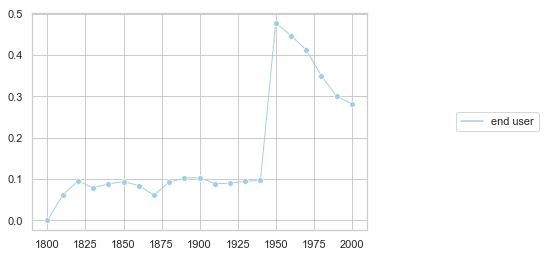

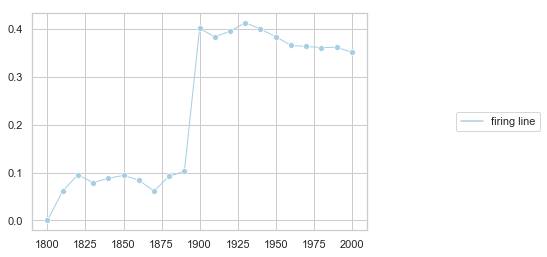

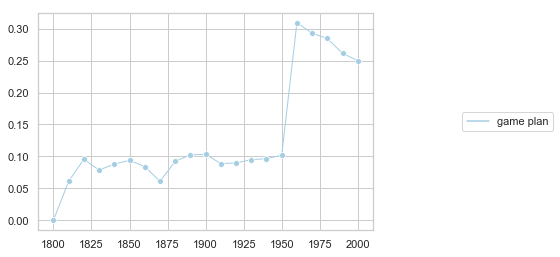

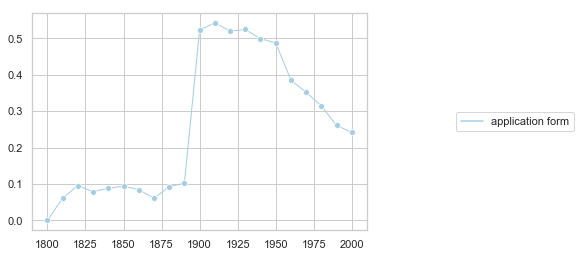

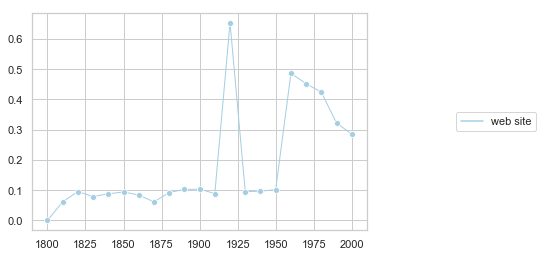

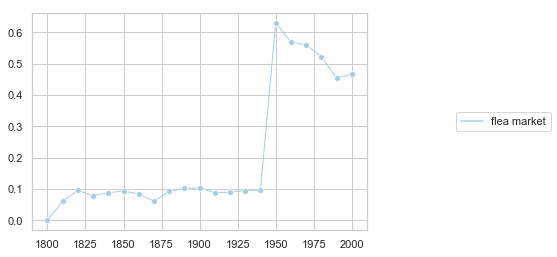

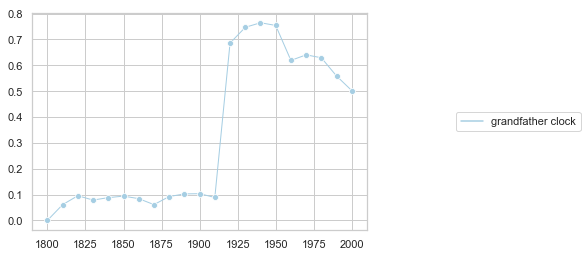

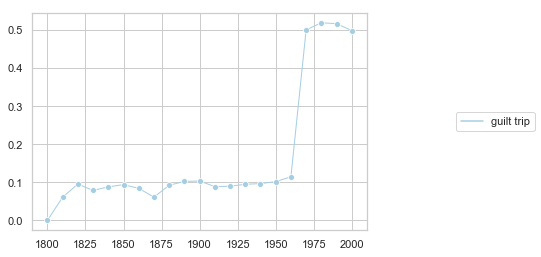

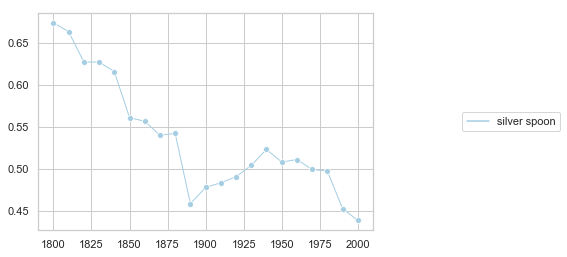

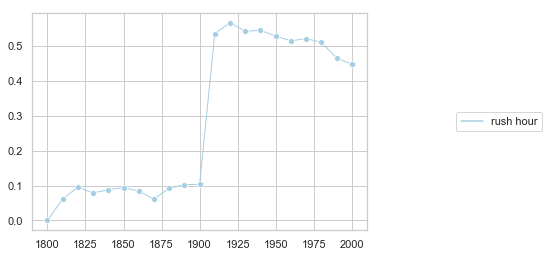

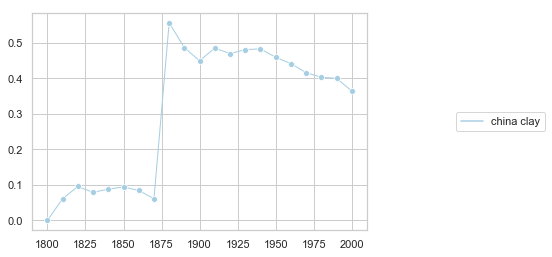

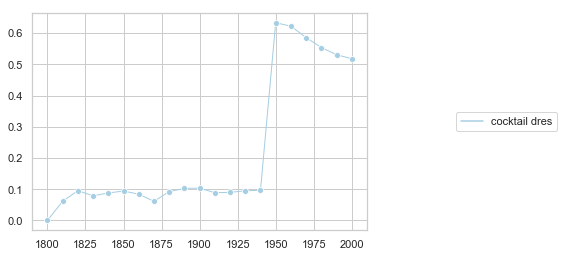

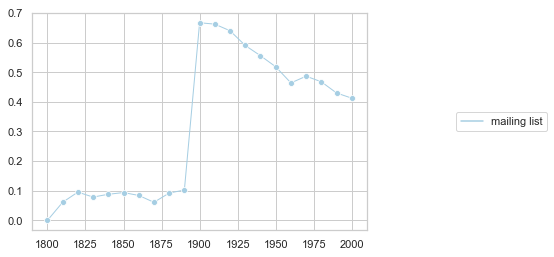

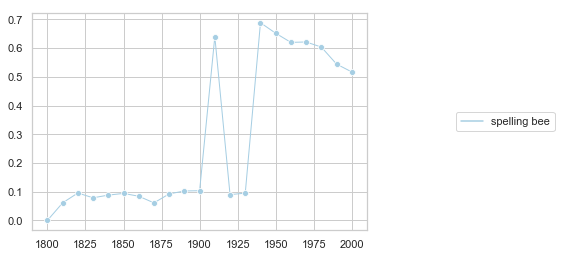

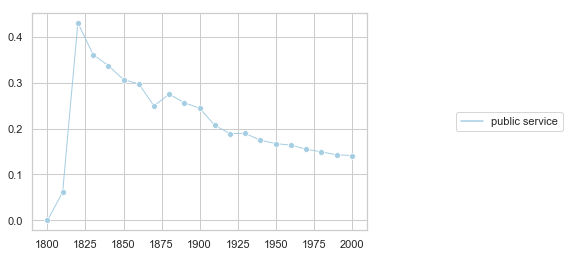

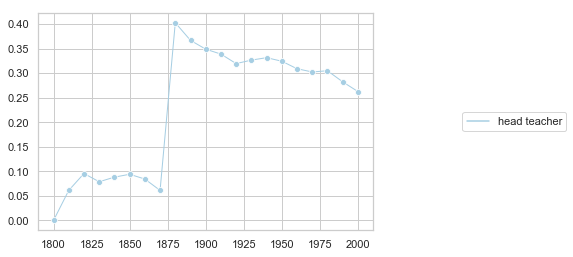

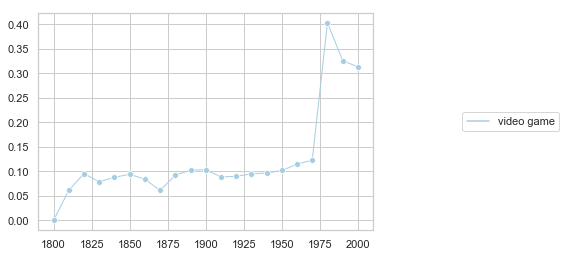

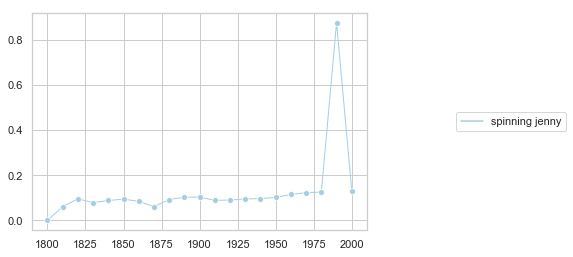

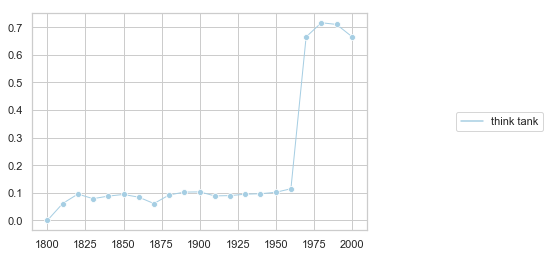

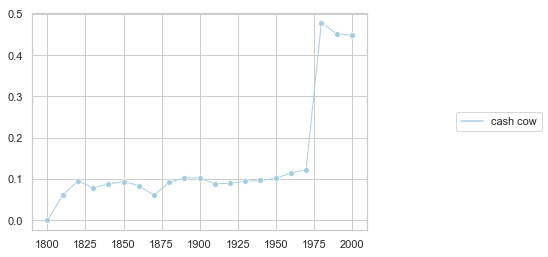

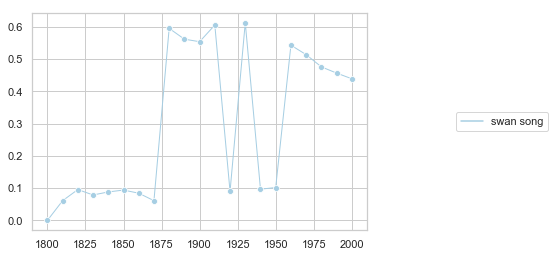

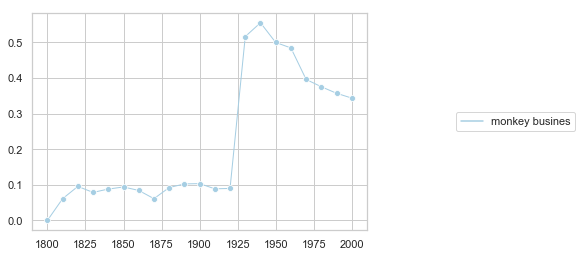

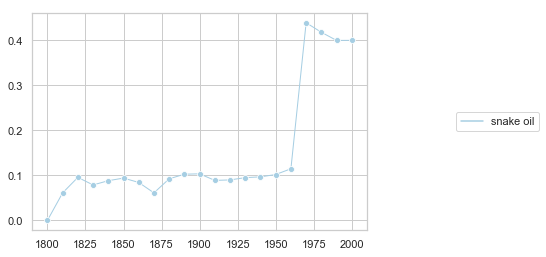

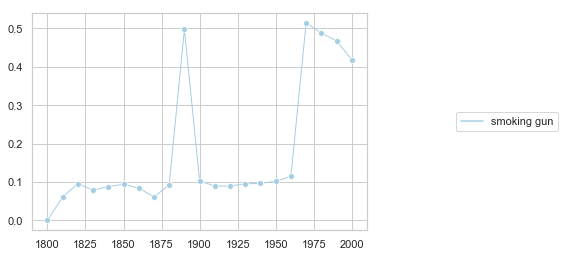

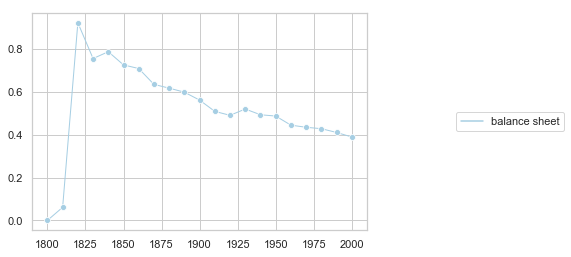

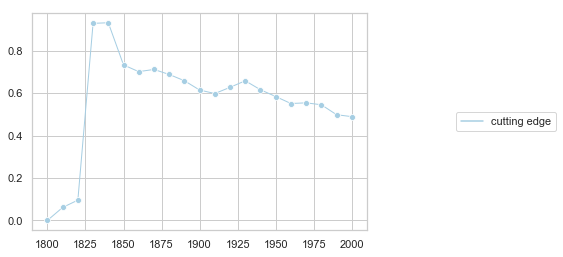

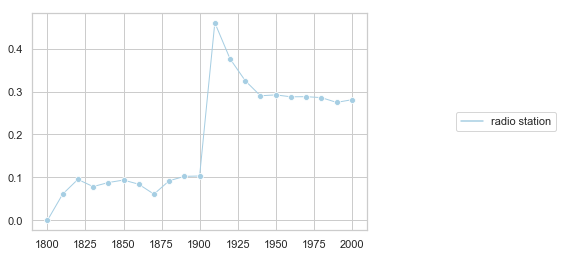

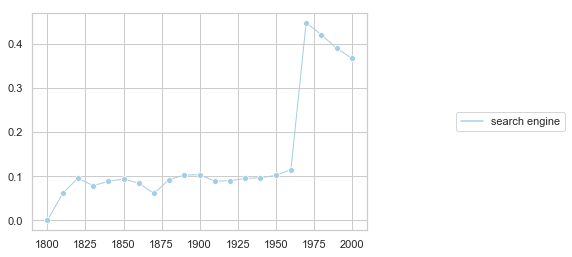

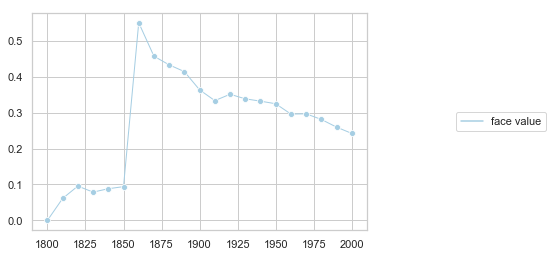

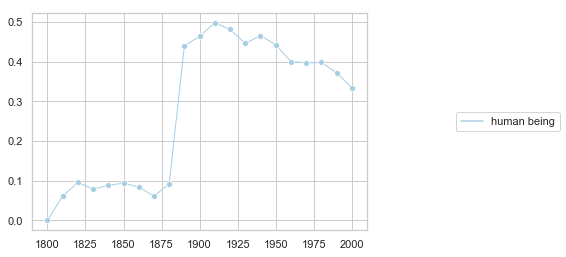

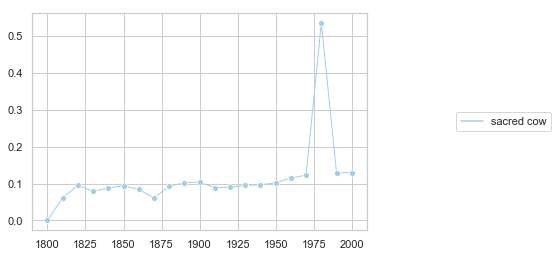

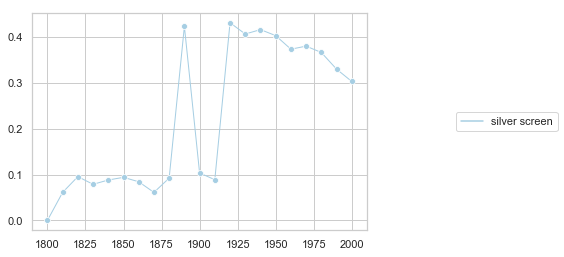

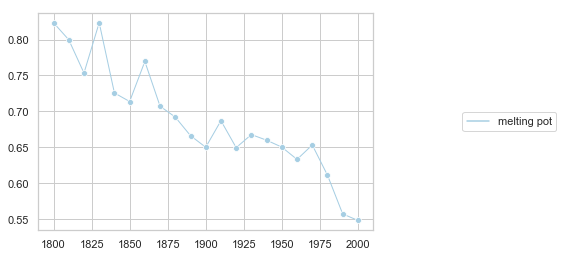

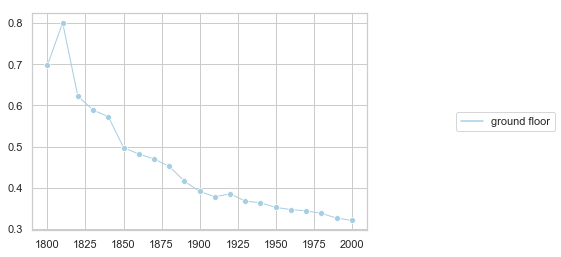

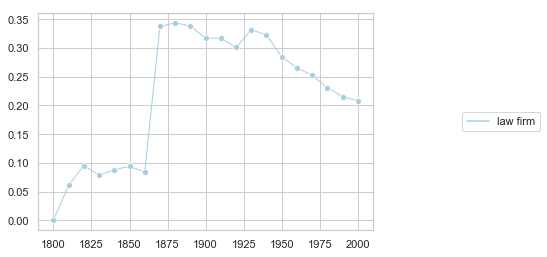

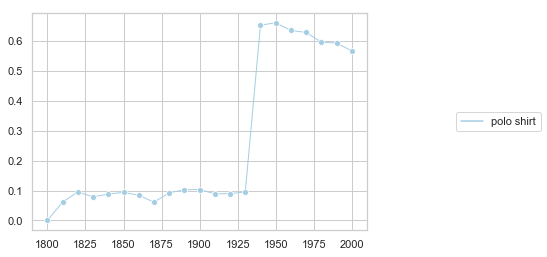

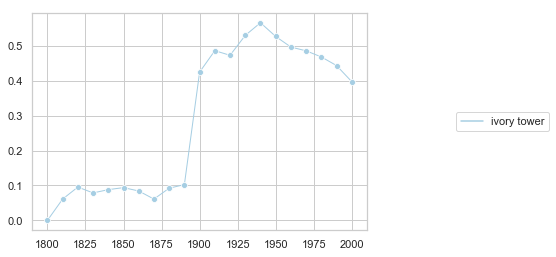

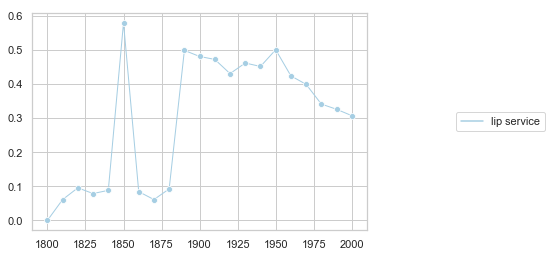

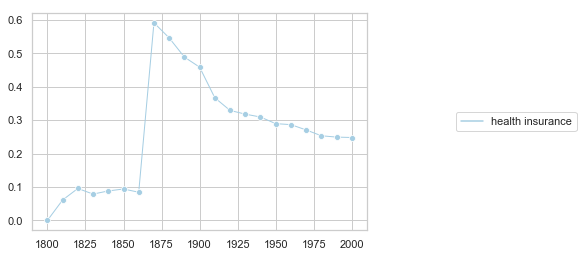

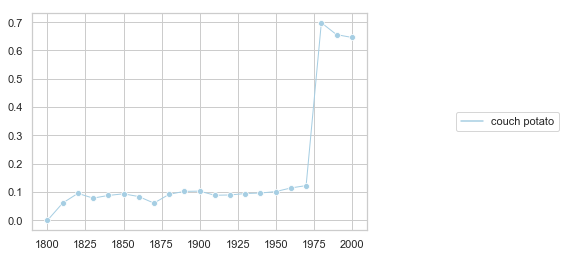

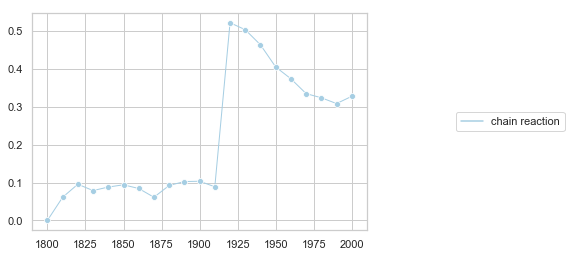

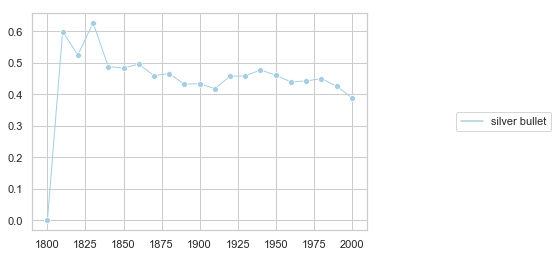

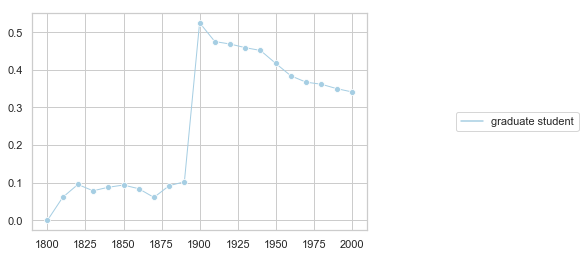

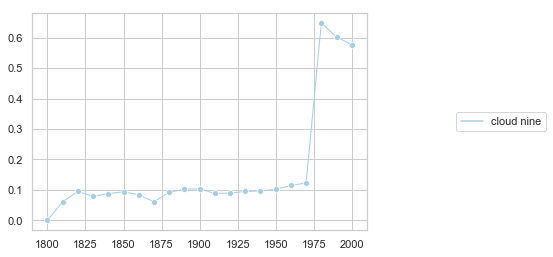

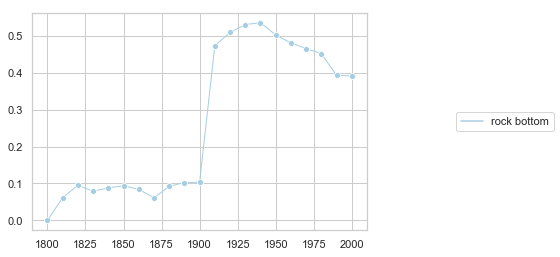

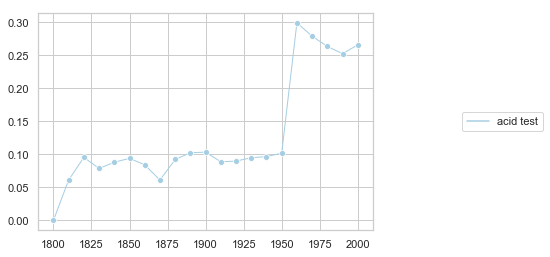

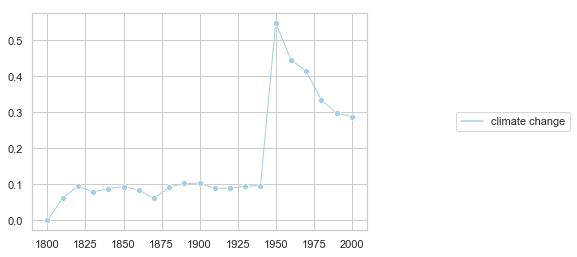

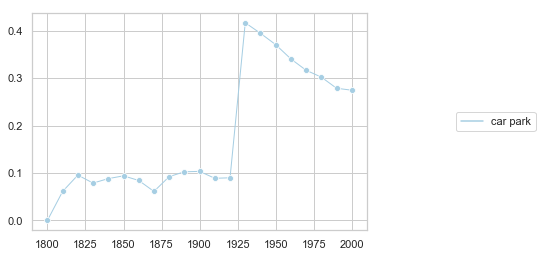

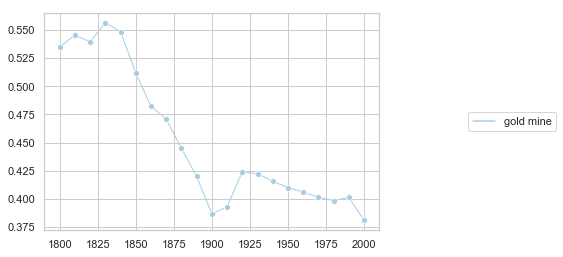

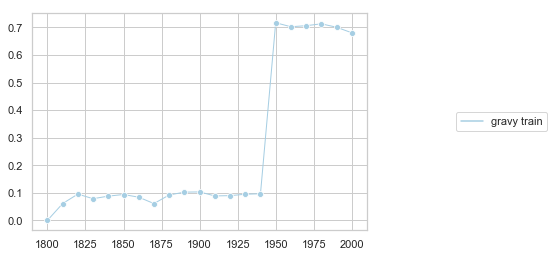

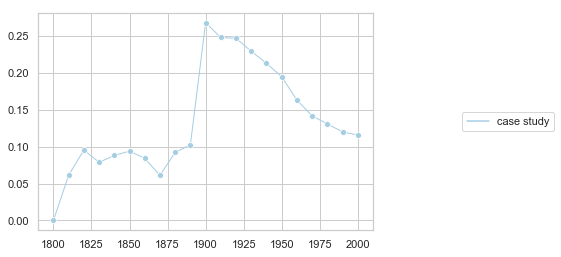

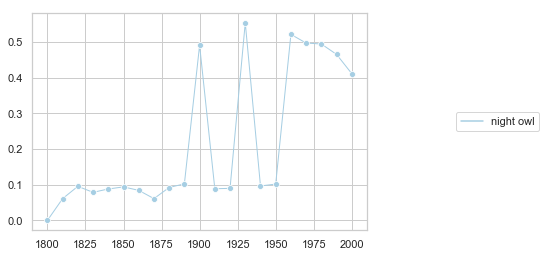

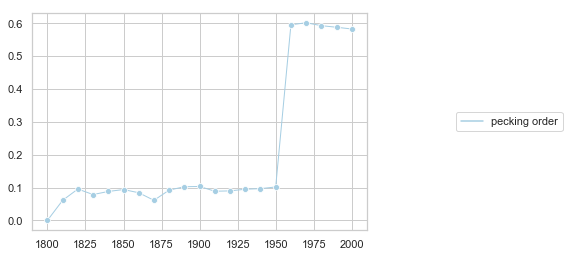

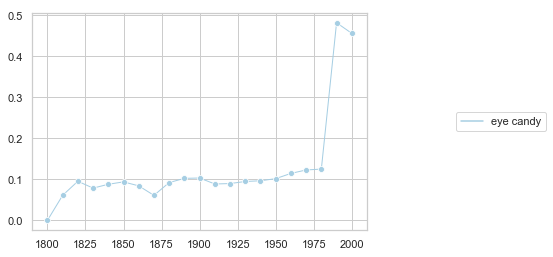

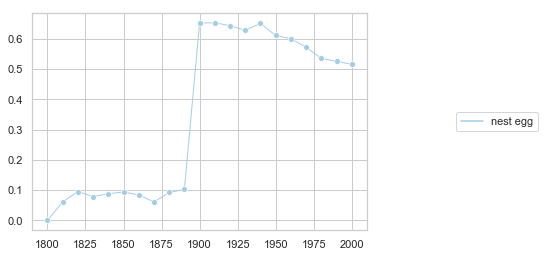

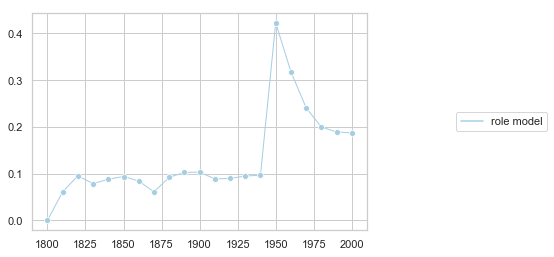

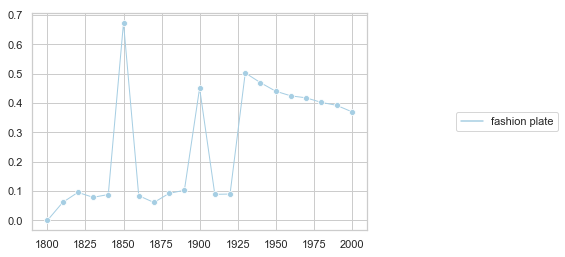

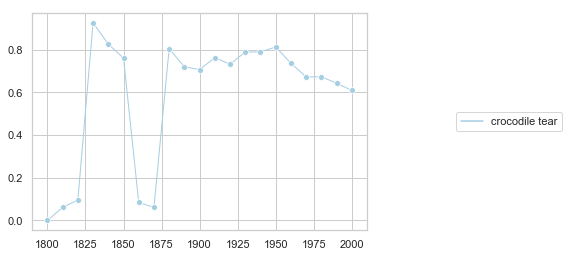

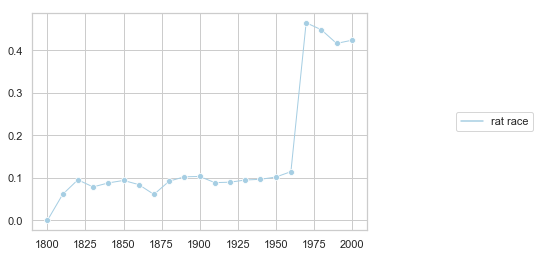

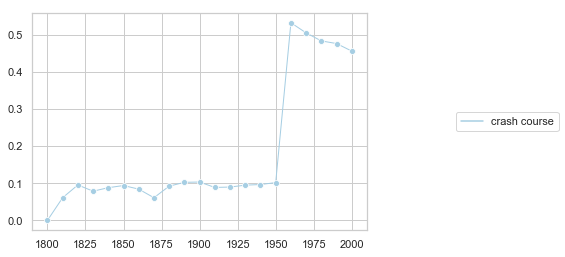

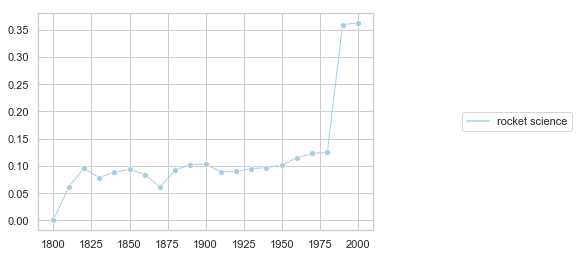

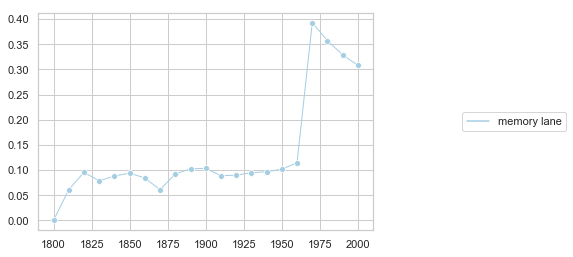

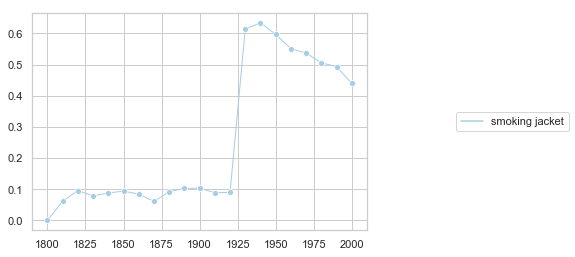

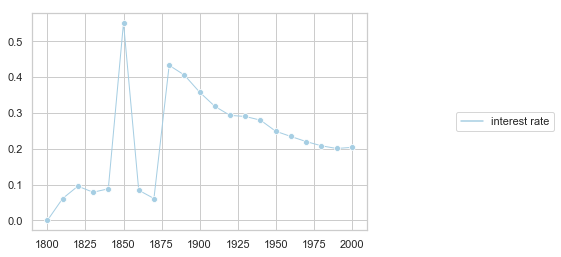

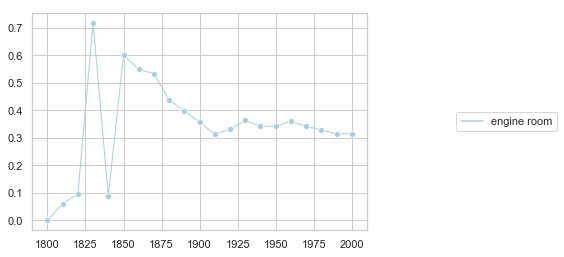

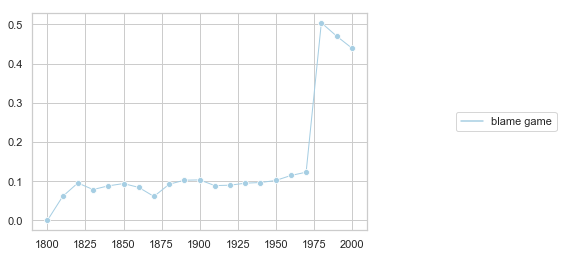

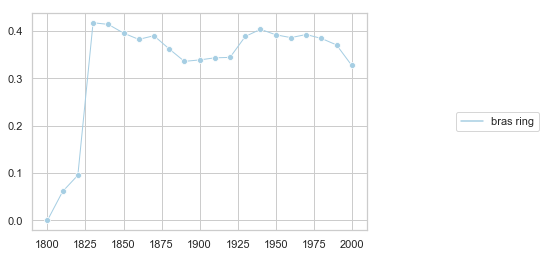

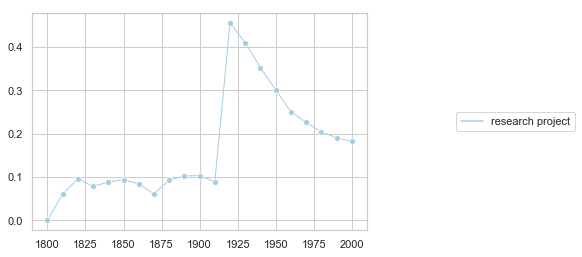

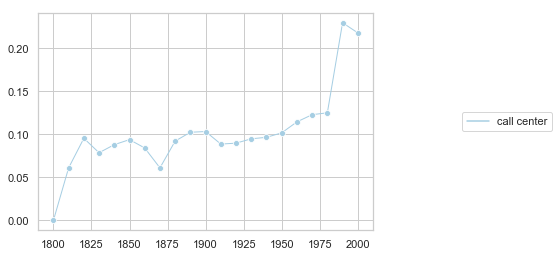

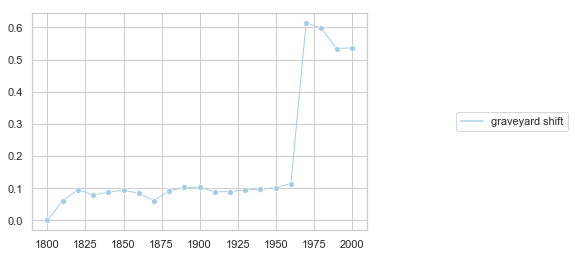

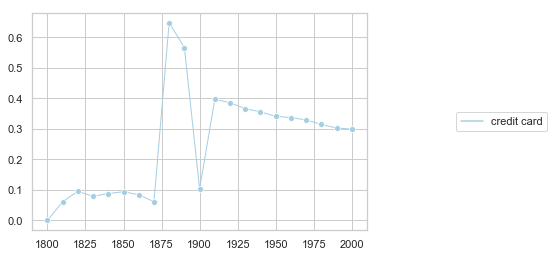

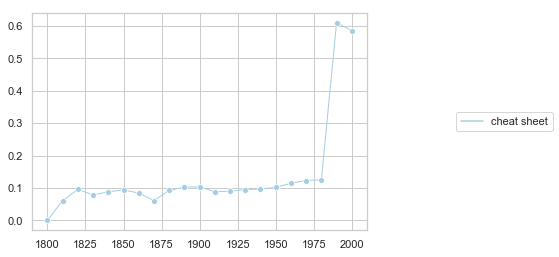

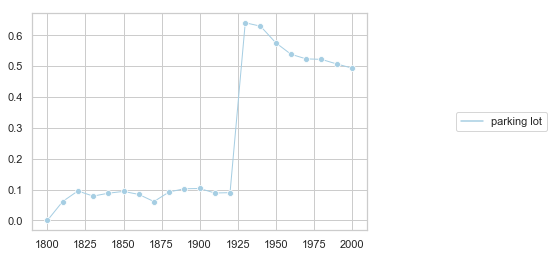

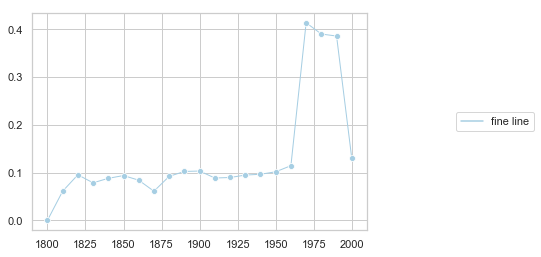

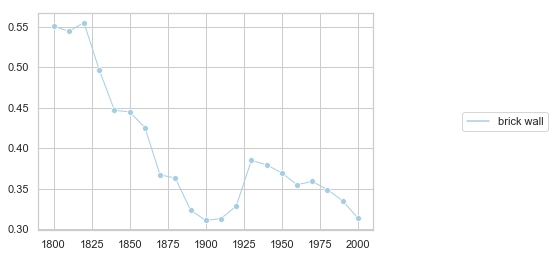

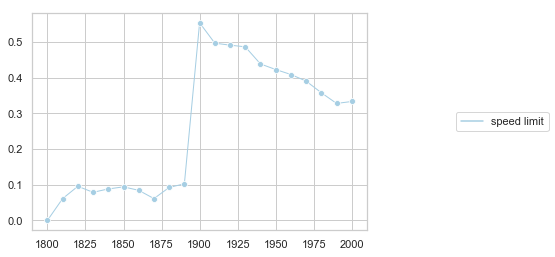

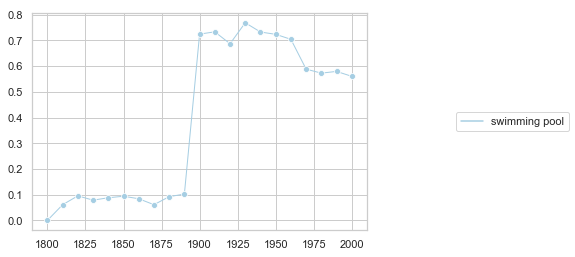

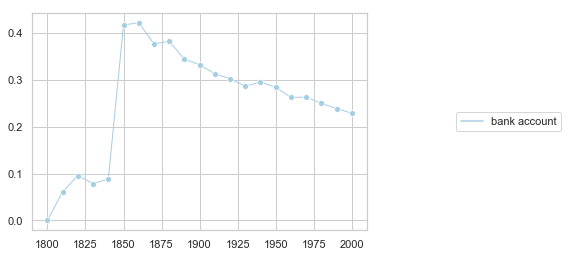

<Figure size 432x288 with 0 Axes>

In [58]:
plt.figure(figsize=(10,10))
for i in range(0,79):
    plt.figure()
    g=sns.lineplot(data=plot_lmi_df.iloc[i].to_frame(), palette="Paired", marker='o',linewidth=1,dashes=False)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))

In [59]:
reddy11_study.loc[(reddy11_study.modifier == 'interest_noun') & (reddy11_study['head'] == 'rate_noun')]

modifier_mean  modifier_std  head_mean  head_std  compound_mean  \
74          4.345         0.992      4.690     0.532          4.571   

    compound_std       modifier       head  
74         0.904  interest_noun  rate_noun

In [63]:
def cosine(row1,row2):
    if row1.name[:-1]!=row2.name[:-1]:
        return np.nan
    else:
        denom1=np.sqrt(np.sum(np.square(row1)))
        denom2=np.sqrt(np.sum(np.square(row2)))
        num=np.sum(row1*row2)
        return num/(denom1*denom2)

In [66]:
cosine_compound_agnostic=[np.nan]
for i in range(1,merge_df_aware.shape[0]):
    cosine_compound_agnostic.append(cosine(merge_df_aware.iloc[i-1],merge_df_aware.iloc[i]))

In [62]:
merge_df_aware=reddy11_study[['modifier','head']].merge(compounds.drop(['common'],axis=1).reset_index(),on=['modifier','head'],how='inner')
merge_df_aware.set_index(["modifier", "head",'time'], inplace = True)
merge_df_aware.head()

0     1     2     3     4      5      6      7    \
modifier head      time                                                      
end_noun user_noun 1950 0.131 0.016 0.114 0.037 0.338 -0.325 -0.599 -0.132   
                   1960 0.126 0.015 0.113 0.037 0.332 -0.319 -0.590 -0.132   
                   1970 0.126 0.015 0.113 0.037 0.334 -0.320 -0.590 -0.131   
                   1980 0.129 0.016 0.114 0.037 0.339 -0.326 -0.600 -0.135   
                   1990 0.130 0.016 0.113 0.037 0.341 -0.328 -0.603 -0.136   

                           8      9    ...    290    291    292   293    294  \
modifier head      time                ...                                     
end_noun user_noun 1950 -0.187 -0.308  ... -0.011  0.002 -0.038 0.016  0.019   
                   1960 -0.189 -0.314  ... -0.014  0.016 -0.003 0.004 -0.003   
                   1970 -0.190 -0.318  ... -0.020 -0.005 -0.013 0.002 -0.006   
                   1980 -0.191 -0.315  ... -0.015 -0.015 -0.010 0.007  0.002   
                   1990 -0.189 -0.307  ... -0.016 -0.009 -0.007 0.003  0.001   

                           295    296    297    298    299  
modifier head      time                                     
end_noun user_noun 1950  0.008 -0.001 -0.010 -0.008  0.001  
                   1960  0.012 -0.008 -0.030  0.013 -0.001  
                   1970  0.005 -0.017 -0.025  0.017  0.004  
                   1980 -0.006 -0.009 -0.011  0.023  0.013  
                   1990 -0.004 -0.002 -0.004  0.023  0.021  

[5 rows x 300 columns]

In [69]:
merge_df_aware['compound_cosine']=cosine_compound_agnostic
compound_df=pd.pivot_table(merge_df_aware.reset_index(), values = 'compound_cosine', index=['modifier','head'], columns = 'time')
compound_df

time                            1810  1820  1830  1840  1850  1860  1870  \
modifier         head                                                      
acid_noun        test_noun       nan   nan   nan   nan   nan   nan   nan   
application_noun form_noun       nan   nan   nan   nan   nan   nan   nan   
balance_noun     sheet_noun      nan   nan 0.681 0.734 0.966 0.950 0.992   
bank_noun        account_noun    nan   nan   nan   nan   nan 0.702 0.889   
blame_noun       game_noun       nan   nan   nan   nan   nan   nan   nan   
brick_noun       wall_noun     0.980 0.802 0.859 0.991 0.992 0.987 0.996   
call_noun        center_noun     nan   nan   nan   nan   nan   nan   nan   
car_noun         park_noun       nan   nan   nan   nan   nan   nan   nan   
case_noun        study_noun      nan   nan   nan   nan   nan   nan   nan   
cash_noun        cow_noun        nan   nan   nan   nan   nan   nan   nan   
chain_noun       reaction_noun   nan   nan   nan   nan   nan   nan   nan   
cheat_noun       sheet_noun      nan   nan   nan   nan   nan   nan   nan   
china_noun       clay_noun       nan   nan   nan   nan   nan   nan   nan   
climate_noun     change_noun     nan   nan   nan   nan   nan   nan   nan   
cloud_noun       nine_noun       nan   nan   nan   nan   nan   nan   nan   
cocktail_noun    dress_noun      nan   nan   nan   nan   nan   nan   nan   
couch_noun       potato_noun     nan   nan   nan   nan   nan   nan   nan   
crash_noun       course_noun     nan   nan   nan   nan   nan   nan   nan   
credit_noun      card_noun       nan   nan   nan   nan   nan   nan   nan   
crocodile_noun   tear_noun       nan   nan   nan 0.939 0.948   nan   nan   
cutting_noun     edge_noun       nan   nan   nan 0.830 0.615 0.970 0.944   
end_noun         user_noun       nan   nan   nan   nan   nan   nan   nan   
engine_noun      room_noun       nan   nan   nan   nan 0.731 0.865 0.720   
eye_noun         candy_noun      nan   nan   nan   nan   nan   nan   nan   
face_noun        value_noun      nan   nan   nan   nan   nan   nan 0.745   
fashion_noun     plate_noun      nan   nan   nan   nan   nan   nan   nan   
fine_noun        line_noun       nan   nan   nan   nan   nan   nan   nan   
firing_noun      line_noun       nan   nan   nan   nan   nan   nan   nan   
flea_noun        market_noun     nan   nan   nan   nan   nan   nan   nan   
game_noun        plan_noun       nan   nan   nan   nan   nan   nan   nan   
...                              ...   ...   ...   ...   ...   ...   ...   
mailing_noun     list_noun       nan   nan   nan   nan   nan   nan   nan   
melting_noun     pot_noun      1.000 0.910 0.898 0.545 0.754 0.835 0.915   
memory_noun      lane_noun       nan   nan   nan   nan   nan   nan   nan   
nest_noun        egg_noun        nan   nan   nan   nan   nan   nan   nan   
night_noun       owl_noun        nan   nan   nan   nan   nan   nan   nan   
parking_noun     lot_noun        nan   nan   nan   nan   nan   nan   nan   
pecking_noun     order_noun      nan   nan   nan   nan   nan   nan   nan   
polo_noun        shirt_noun      nan   nan   nan   nan   nan   nan   nan   
public_noun      service_noun    nan   nan 0.133 0.543 0.672 0.832 0.881   
radio_noun       station_noun    nan   nan   nan   nan   nan   nan   nan   
rat_noun         race_noun       nan   nan   nan   nan   nan   nan   nan   
research_noun    project_noun    nan   nan   nan   nan   nan   nan   nan   
rock_noun        bottom_noun     nan   nan   nan   nan   nan   nan   nan   
rocket_noun      science_noun    nan   nan   nan   nan   nan   nan   nan   
role_noun        model_noun      nan   nan   nan   nan   nan   nan   nan   
rush_noun        hour_noun       nan   nan   nan   nan   nan   nan   nan   
search_noun      engine_noun     nan   nan   nan   nan   nan   nan   nan   
silver_noun      bullet_noun     nan 0.484 0.971 0.773 0.684 0.983 0.930   
                 screen_noun     nan   nan   nan   nan   nan   nan   nan   
                 spoon_noun    0.904 0.747 0.953

In [77]:
plot_compound_df=compound_df.reset_index()
plot_compound_df['compound']=plot_compound_df['modifier'].str[:-5]+' '+plot_compound_df['head'].str[:-5]
plot_compound_df.drop(['modifier','head'],axis=1,inplace=True)
plot_compound_df.set_index('compound',inplace=True)
plot_compound_df

time              1810  1820  1830  1840  1850  1860  1870  1880  1890  1900  \
compound                                                                       
acid test          nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
application form   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
balance sheet      nan   nan 0.681 0.734 0.966 0.950 0.992 0.958 0.968 0.982   
bank account       nan   nan   nan   nan   nan 0.702 0.889 0.805 0.985 0.993   
blame game         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
brick wall       0.980 0.802 0.859 0.991 0.992 0.987 0.996 0.989 0.978 0.996   
call center        nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
car park           nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
case study         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
cash cow           nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
chain reaction     nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
cheat sheet        nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
china clay         nan   nan   nan   nan   nan   nan   nan   nan 0.772 0.572   
climate change     nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
cloud nine         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
cocktail dress     nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
couch potato       nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
crash course       nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
credit card        nan   nan   nan   nan   nan   nan   nan   nan 0.980   nan   
crocodile tear     nan   nan   nan 0.939 0.948   nan   nan 0.925 0.990 0.931   
cutting edge       nan   nan   nan 0.830 0.615 0.970 0.944 0.989 0.973 0.952   
end user           nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
engine room        nan   nan   nan   nan 0.731 0.865 0.720 0.442 0.953 0.975   
eye candy          nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
face value         nan   nan   nan   nan   nan   nan 0.745 0.892 0.900 0.967   
fashion plate      nan   nan   nan   nan   nan   nan   nan   nan   nan 0.238   
fine line          nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
firing line        nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
flea market        nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
game plan          nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
mailing list       nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
melting pot      1.000 0.910 0.898 0.545 0.754 0.835 0.915 0.919 0.989 0.992   
memory lane        nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
nest egg           nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
night owl          nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
parking lot        nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
pecking order      nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
polo shirt         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
public service     nan   nan 0.133 0.543 0.672 0.832 0.881 0.342 0.742 0.840   
radio station      nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
rat race           nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
research project   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
rock bottom        nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
rocket science     nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
role model         nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
rush hour          nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   
search engine      nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   


IndexError: single positional indexer is out-of-bounds

<Figure size 720x720 with 0 Axes>

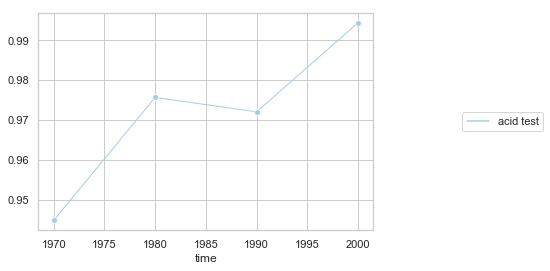

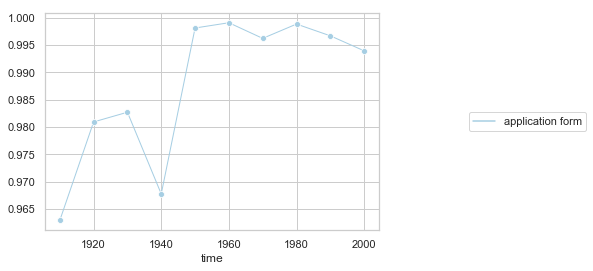

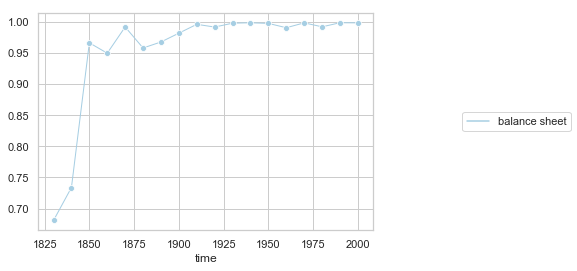

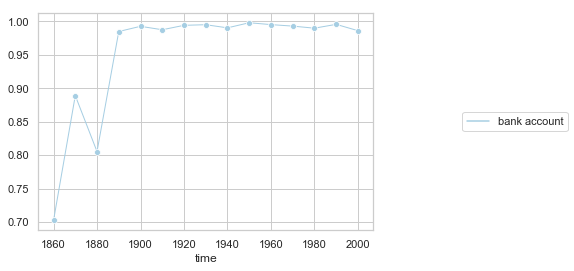

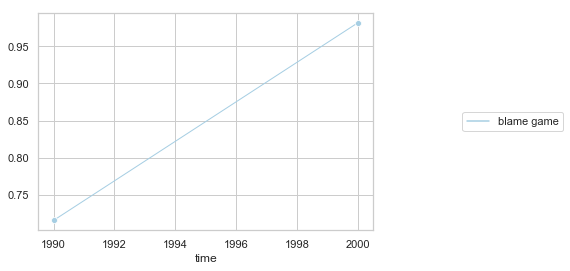

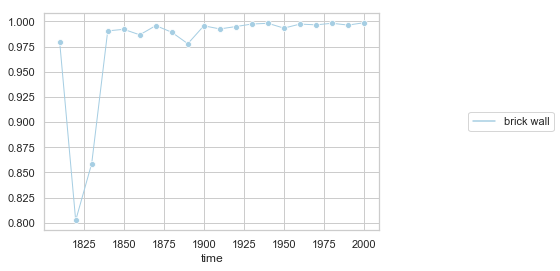

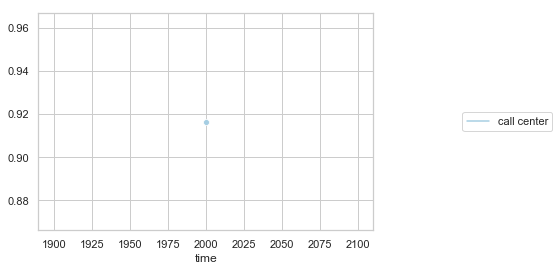

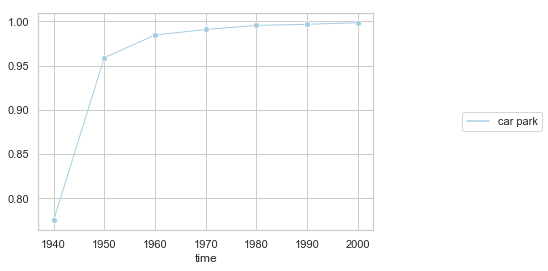

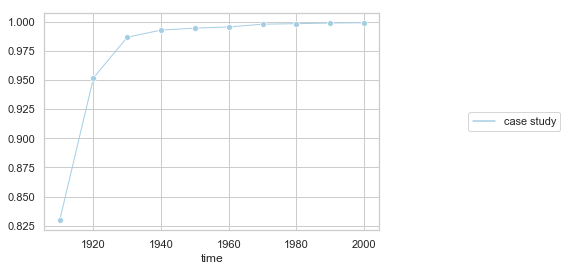

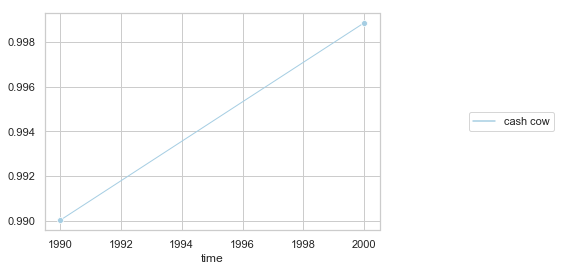

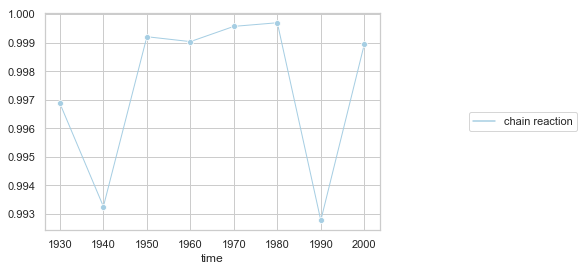

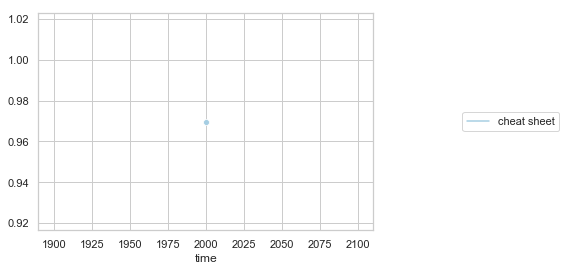

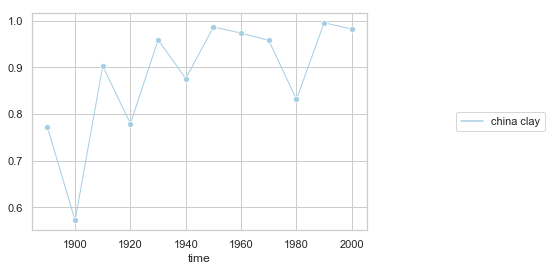

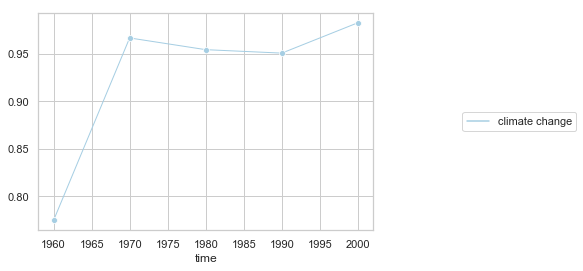

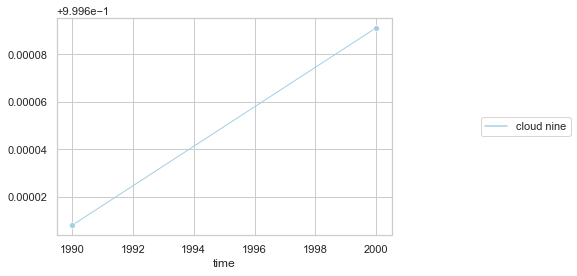

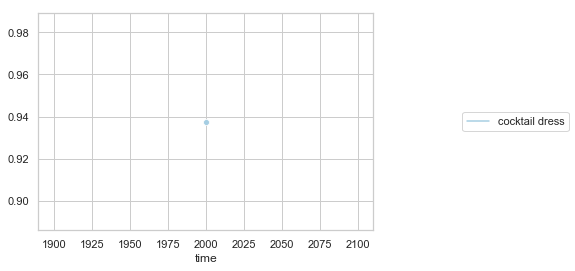

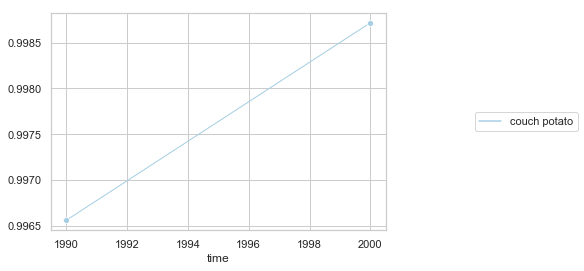

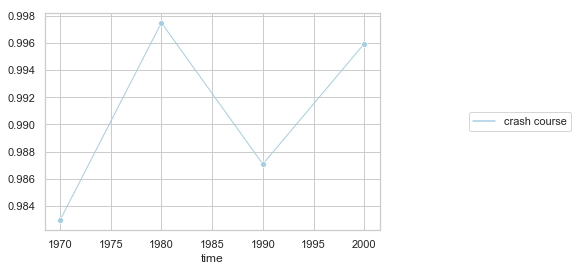

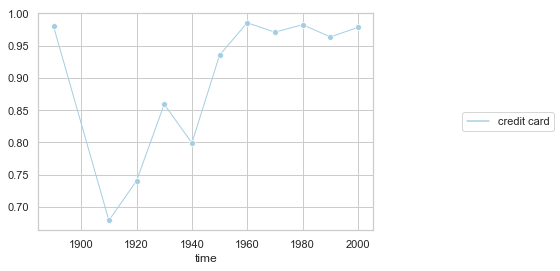

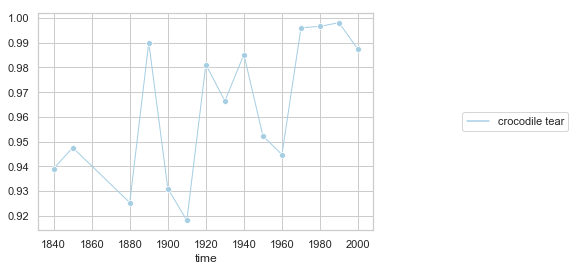

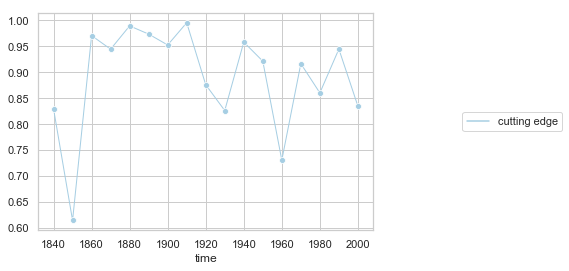

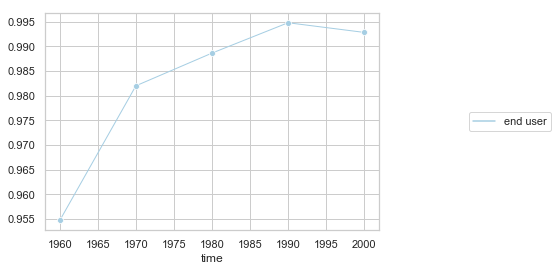

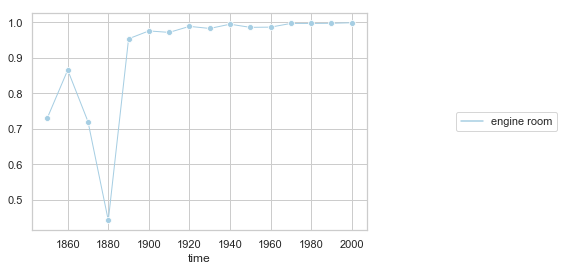

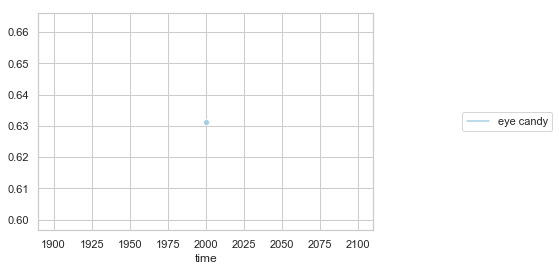

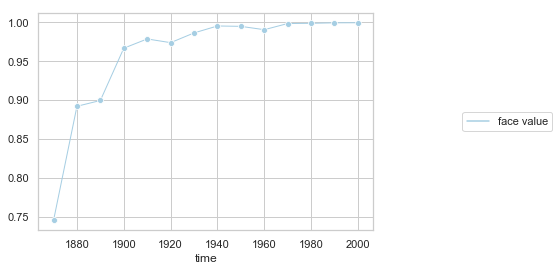

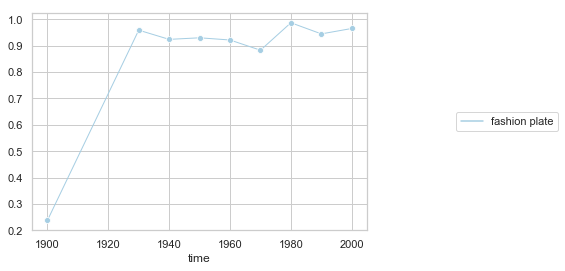

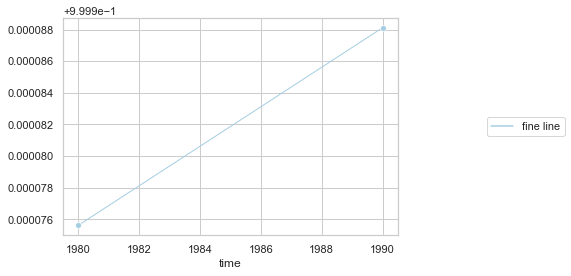

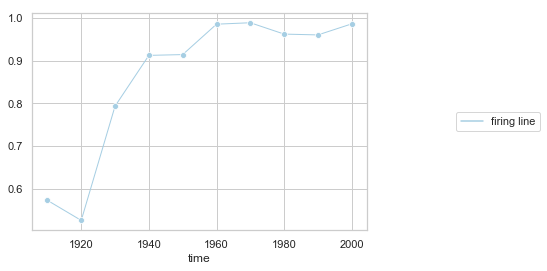

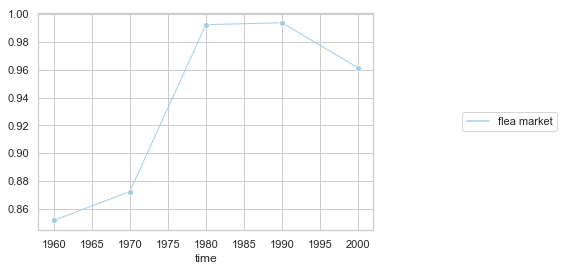

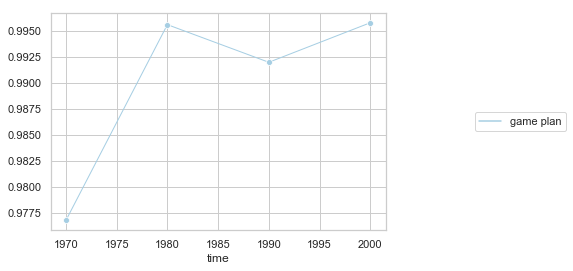

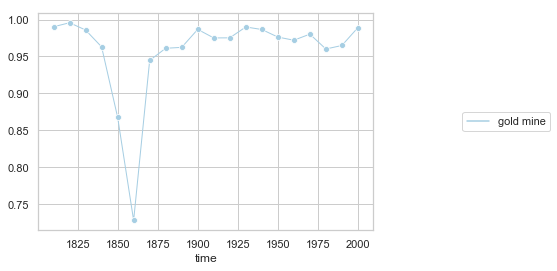

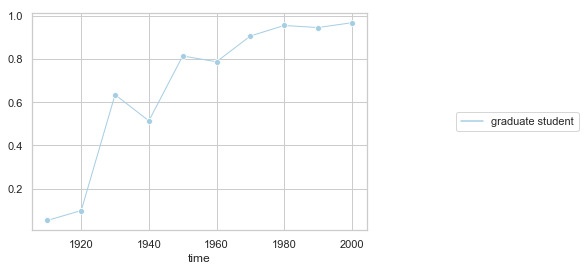

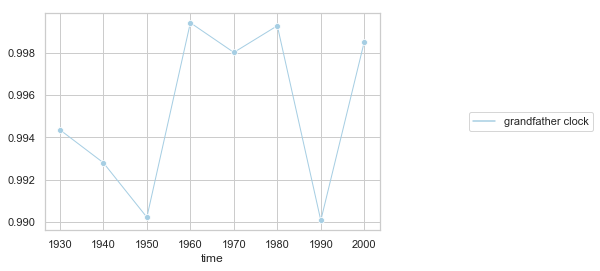

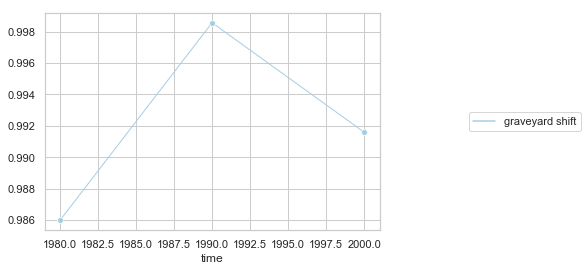

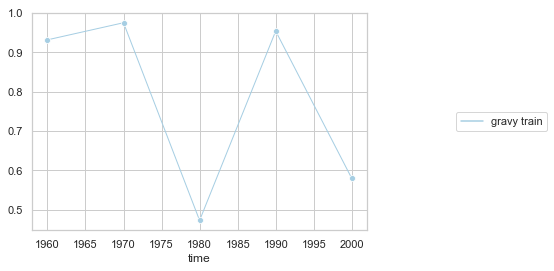

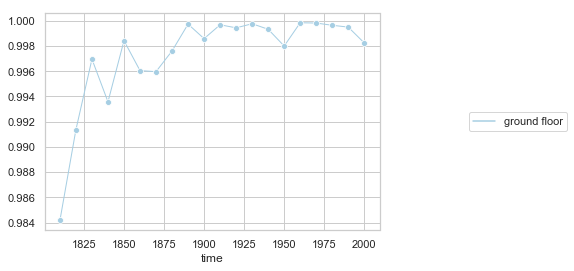

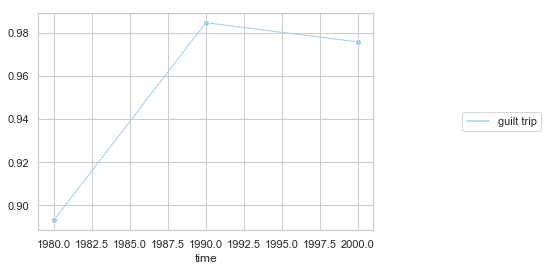

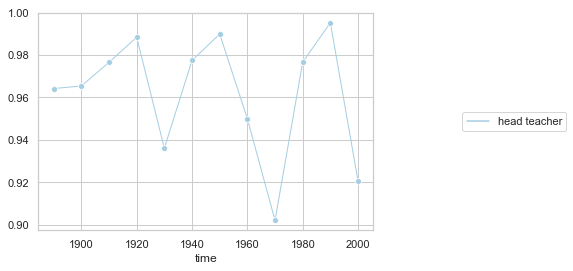

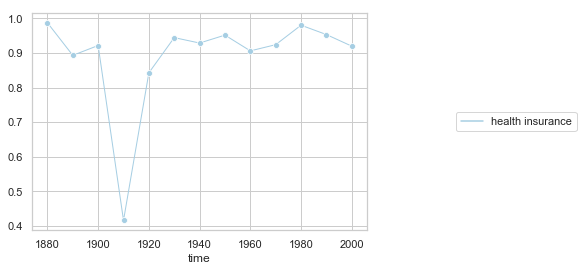

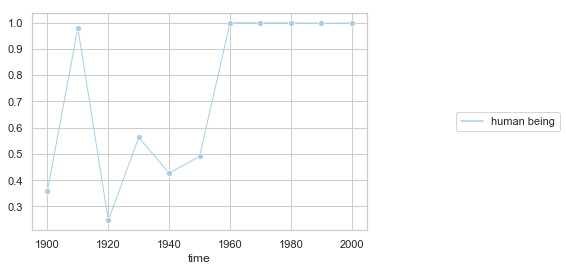

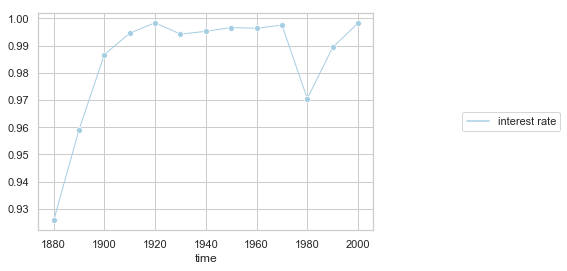

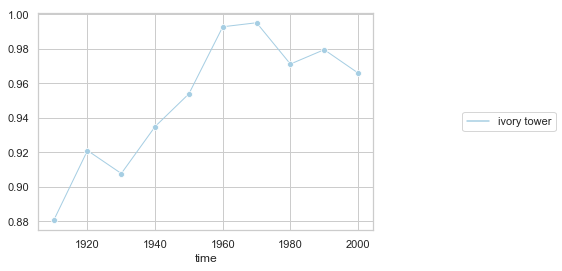

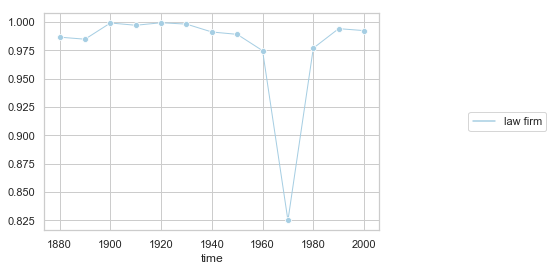

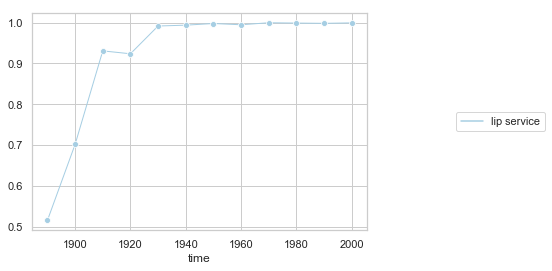

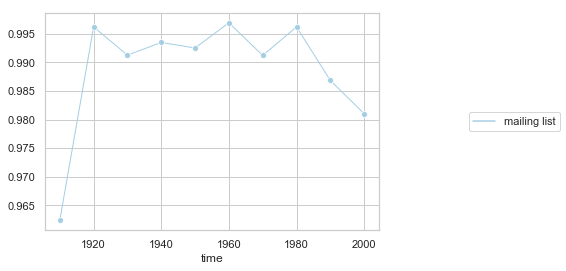

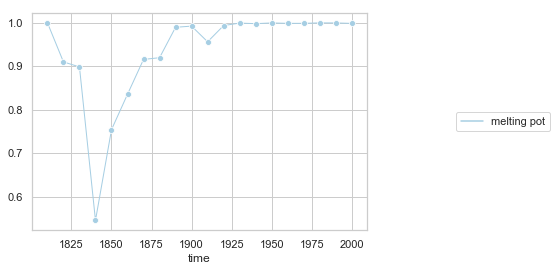

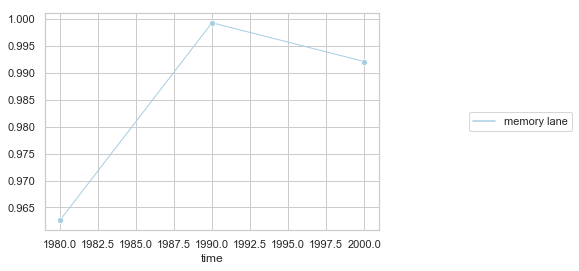

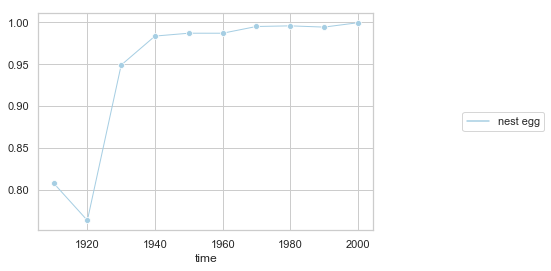

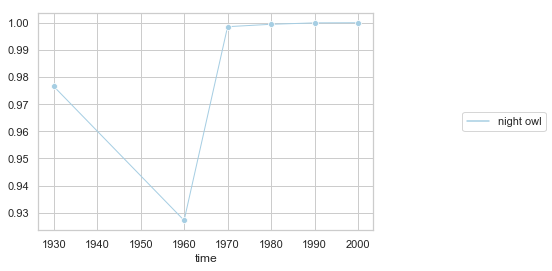

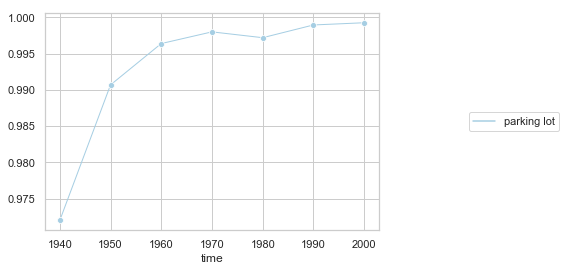

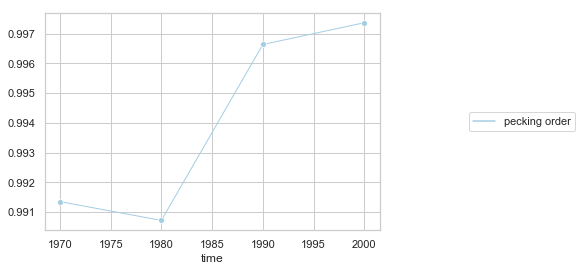

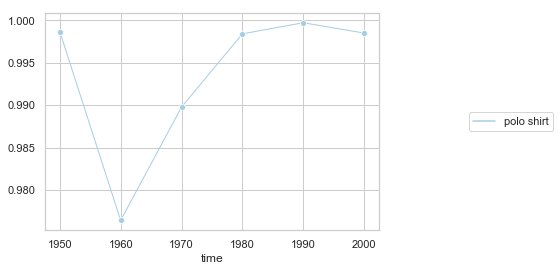

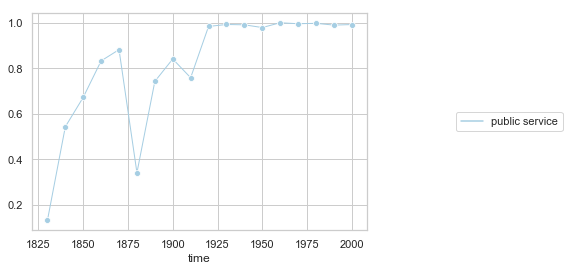

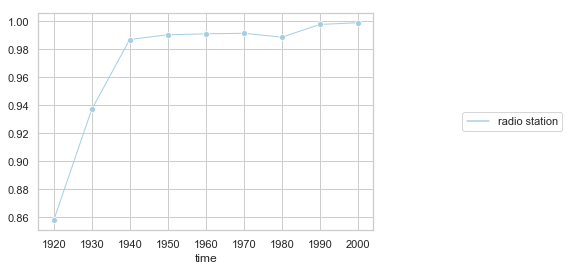

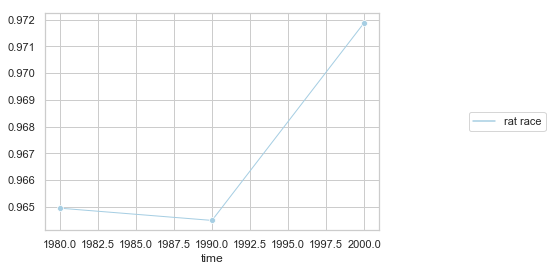

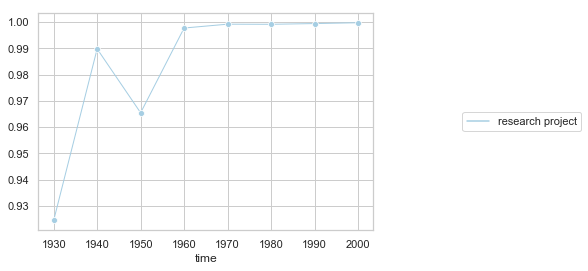

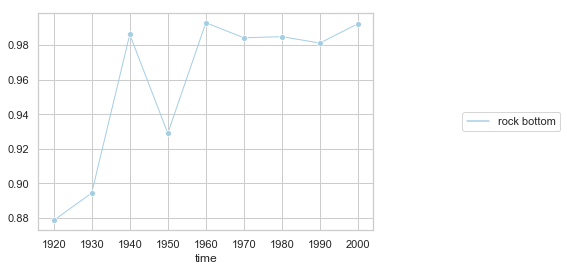

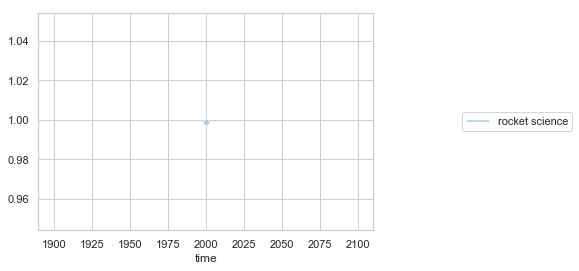

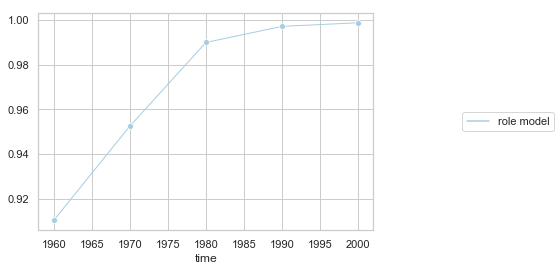

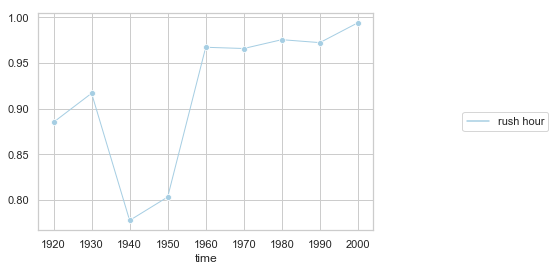

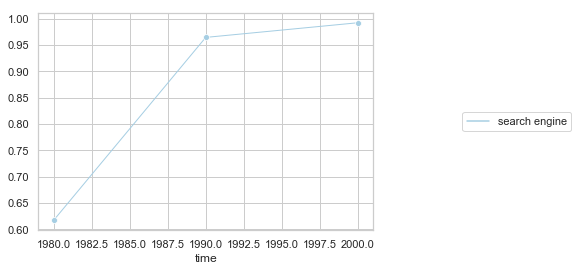

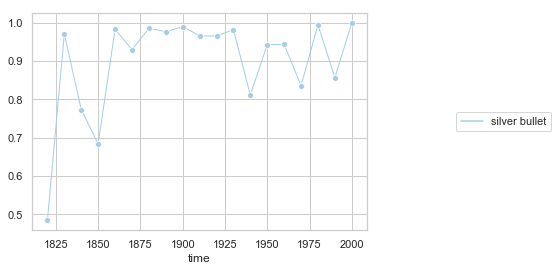

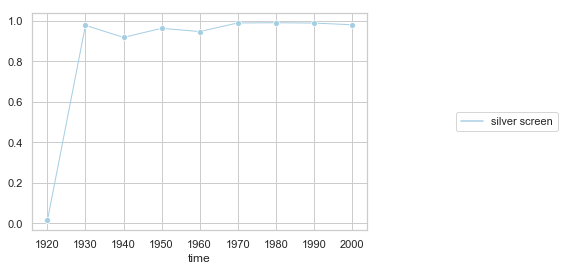

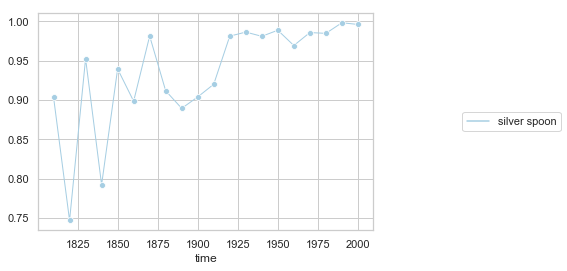

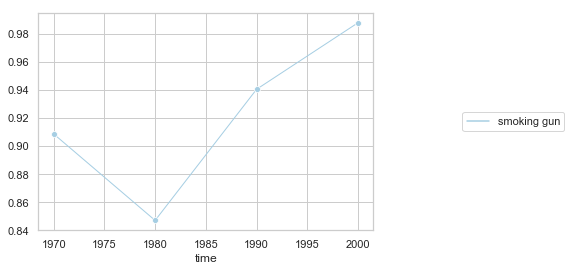

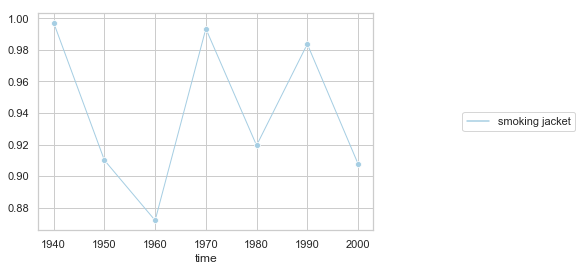

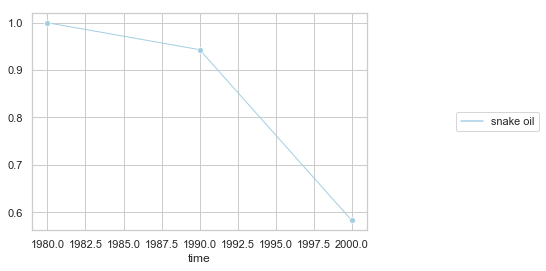

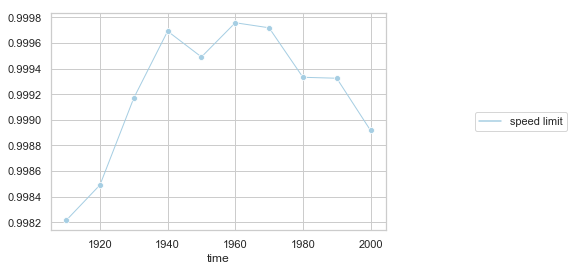

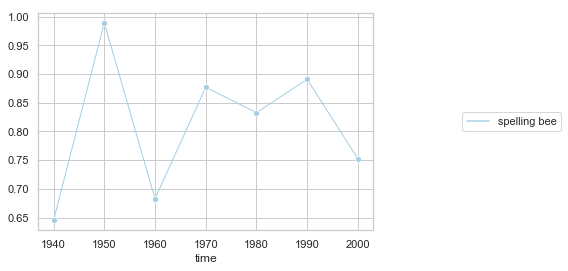

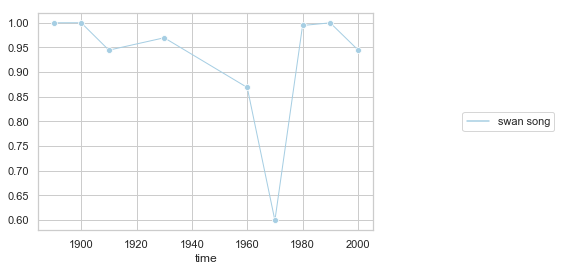

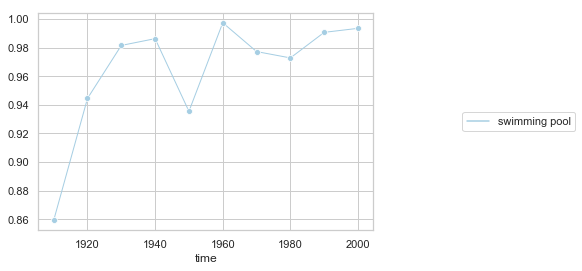

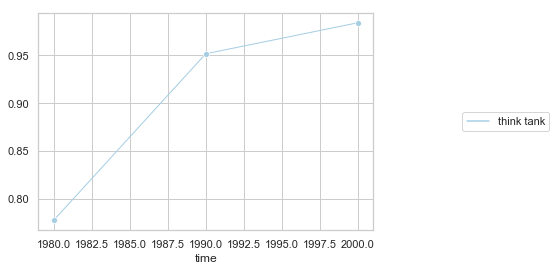

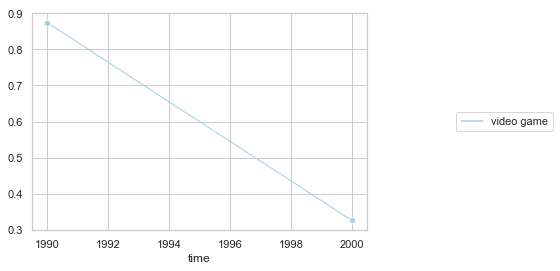

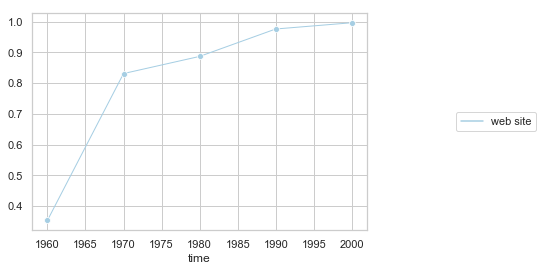

<Figure size 432x288 with 0 Axes>

In [78]:
plt.figure(figsize=(10,10))
for i in range(0,75):
    plt.figure()
    g=sns.lineplot(data=plot_compound_df.iloc[i].to_frame(), palette="Paired", marker='o',linewidth=1,dashes=False)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))

In [85]:
merge_df_aware_heads=reddy11_study[['modifier','head']].merge(heads.reset_index(),on=['head'],how='inner')
merge_df_aware_heads.set_index(["modifier", "head",'time'], inplace = True)
merge_df_aware_heads.head()

0     1     2     3     4      5      6      7    \
modifier head      time                                                      
end_noun user_noun 1870 0.000 0.000 0.001 0.000 0.003 -0.003 -0.004 -0.001   
                   1880 0.001 0.000 0.001 0.000 0.006 -0.003 -0.005 -0.002   
                   1890 0.001 0.000 0.001 0.000 0.005 -0.005 -0.007 -0.002   
                   1900 0.014 0.013 0.008 0.002 0.030 -0.030 -0.044 -0.002   
                   1910 0.010 0.006 0.008 0.002 0.039 -0.037 -0.058 -0.003   

                           8      9    ...    290    291    292    293    294  \
modifier head      time                ...                                      
end_noun user_noun 1870 -0.002 -0.003  ...  0.050  0.003  0.016 -0.060 -0.027   
                   1880 -0.002 -0.005  ...  0.038 -0.002  0.038 -0.073 -0.018   
                   1890 -0.002 -0.005  ... -0.014 -0.084  0.085 -0.093  0.045   
                   1900 -0.011 -0.036  ... -0.008 -0.042  0.036 -0.046  0.000   
                   1910 -0.014 -0.043  ...  0.016 -0.014 -0.034  0.022 -0.021   

                           295    296    297    298    299  
modifier head      time                                     
end_noun user_noun 1870 -0.006  0.003 -0.001  0.047  0.013  
                   1880 -0.011 -0.020 -0.021  0.038  0.014  
                   1890 -0.031 -0.112 -0.117 -0.020 -0.050  
                   1900 -0.051 -0.075 -0.099  0.017 -0.044  
                   1910 -0.045  0.015 -0.047  0.054 -0.034  

[5 rows x 300 columns]

In [88]:
cosine_head_agnostic=[np.nan]
for i in range(1,merge_df_aware_heads.shape[0]):
    cosine_head_agnostic.append(cosine(merge_df_aware_heads.iloc[i-1],merge_df_aware_heads.iloc[i]))

In [91]:
merge_df_aware_heads['head_cosine']=cosine_head_agnostic
head_df=pd.pivot_table(merge_df_aware_heads.reset_index(), values = 'head_cosine', index=['modifier','head'], columns = 'time')
head_df

time                            1810  1820  1830  1840  1850  1860  1870  \
modifier         head                                                      
acid_noun        test_noun     0.989 0.972 0.956 0.957 0.919 0.923 0.713   
agony_noun       aunt_noun     0.531 0.645 0.846 0.833 0.905 0.870 0.874   
application_noun form_noun     0.916 0.906 0.875 0.925 0.853 0.924 0.949   
balance_noun     sheet_noun    0.790 0.862 0.977 0.981 0.991 0.997 0.997   
bank_noun        account_noun  0.976 0.860 0.877 0.975 0.967 0.846 0.879   
blame_noun       game_noun     0.772 0.909 0.899 0.855 0.845 0.773 0.394   
brass_noun       ring_noun     0.856 0.911 0.936 0.952 0.975 0.987 0.989   
brick_noun       wall_noun     0.995 0.989 0.985 0.994 0.993 0.995 0.993   
call_noun        center_noun   0.211 0.021 0.758 0.203 0.680 0.823 0.913   
car_noun         park_noun     0.674 0.750 0.883 0.920 0.974 0.870 0.849   
case_noun        study_noun    0.863 0.847 0.887 0.847 0.881 0.891 0.925   
cash_noun        cow_noun      0.523 0.374 0.530 0.925 0.856 0.640 0.628   
chain_noun       reaction_noun   nan   nan   nan   nan 0.996 0.980 0.993   
cheat_noun       sheet_noun    0.790 0.862 0.977 0.981 0.991 0.997 0.997   
china_noun       clay_noun     0.109 0.597 0.969 0.918 0.937 0.940 0.966   
climate_noun     change_noun   0.956 0.987 0.972 0.982 0.982 0.985 0.927   
cloud_noun       nine_noun       nan   nan   nan   nan   nan   nan   nan   
cocktail_noun    dress_noun    0.719 0.428 0.798 0.799 0.511 0.841 0.913   
couch_noun       potato_noun     nan   nan   nan   nan   nan 0.508 0.639   
crash_noun       course_noun   0.838 0.971 0.961 0.918 0.832 0.916 0.978   
credit_noun      card_noun     0.764 0.483 0.316 0.890 0.973 0.935 0.924   
crocodile_noun   tear_noun     0.849 0.908 0.634 0.926 0.839 0.547 0.825   
cutting_noun     edge_noun     0.852 0.953 0.919 0.837 0.816 0.982 0.944   
diamond_noun     wedding_noun  1.000 0.993 0.755 0.828 0.746 0.980 0.615   
end_noun         user_noun       nan   nan   nan   nan   nan   nan   nan   
engine_noun      room_noun     0.904 0.978 0.951 0.942 0.970 0.989 0.987   
eye_noun         candy_noun      nan   nan 0.944 0.913 0.954   nan 0.437   
face_noun        value_noun    0.922 0.760 0.944 0.983 0.974 0.990 0.998   
fashion_noun     plate_noun    0.981 0.962 0.955 0.977 0.978 0.976 0.983   
fine_noun        line_noun     0.991 0.997 0.997 0.998 0.998 0.988 0.996   
...                              ...   ...   ...   ...   ...   ...   ...   
polo_noun        shirt_noun    0.664 0.929 0.950 0.882 0.954 0.982 0.979   
public_noun      service_noun  0.974 0.924 0.951 0.991 0.951 0.935 0.964   
radio_noun       station_noun  0.763 0.894 0.628 0.922 0.977 0.988 0.993   
rat_noun         race_noun     0.916 0.955 0.966 0.908 0.964 0.989 0.865   
                 run_noun      0.929 0.972 0.975 0.973 0.975 0.587 0.973   
research_noun    project_noun  0.919 0.880 0.836 0.659 0.750 0.759 0.692   
rock_noun        bottom_noun   0.886 0.834 0.513 0.571 0.899 0.960 0.929   
rocket_noun      science_noun  0.606 0.676 0.811 0.960 0.985 0.957 0.989   
role_noun        model_noun    0.889 0.950 0.603 0.914 0.965 0.964 0.273   
rush_noun        hour_noun     0.994 0.994 0.991 0.996 0.997 0.991 0.974   
sacred_noun      cow_noun      0.523 0.374 0.530 0.925 0.856 0.640 0.628   
search_noun      engine_noun   0.945 0.980 0.991 0.978 0.991 0.982 0.984   
shrinking_noun   violet_noun     nan   nan   nan   nan   nan 0.062 0.642   
silver_noun      bullet_noun   0.872 0.891 0.748 0.723 0.774 0.906 0.911   
                 screen_noun   0.140 0.725 0.761 0.779 0.640 0.830 0.872   
                 spoon_noun    0.921 0.808 0.953 0.921 0.953 0.961 0.920   
sitting_noun     duck_noun     0.519 0.246 0.910 0.902 0.937 0.669 0.667   
smoking_noun     gun_noun      0.923 0.983 0.992 0.993 0.957 0.927 0.984   
                 jacket_noun   0.737 0.819 0.873 0.612 0.867 0.876 0.924   
snail_noun       mail_noun       nan 0.591 0.357

In [92]:
plot_head_df=head_df.reset_index()
plot_head_df['compound']=plot_head_df['modifier'].str[:-5]+' '+plot_head_df['head'].str[:-5]
plot_head_df.drop(['modifier','head'],axis=1,inplace=True)
plot_head_df.set_index('compound',inplace=True)
plot_head_df

time              1810  1820  1830  1840  1850  1860  1870  1880  1890  1900  \
compound                                                                       
acid test        0.989 0.972 0.956 0.957 0.919 0.923 0.713 0.823 0.657 0.806   
agony aunt       0.531 0.645 0.846 0.833 0.905 0.870 0.874 0.448 0.260 0.729   
application form 0.916 0.906 0.875 0.925 0.853 0.924 0.949 0.949 0.972 0.996   
balance sheet    0.790 0.862 0.977 0.981 0.991 0.997 0.997 0.998 0.998 0.997   
bank account     0.976 0.860 0.877 0.975 0.967 0.846 0.879 0.917 0.961 0.899   
blame game       0.772 0.909 0.899 0.855 0.845 0.773 0.394 0.571 0.839 0.805   
brass ring       0.856 0.911 0.936 0.952 0.975 0.987 0.989 0.968 0.980 0.971   
brick wall       0.995 0.989 0.985 0.994 0.993 0.995 0.993 0.990 0.993 0.994   
call center      0.211 0.021 0.758 0.203 0.680 0.823 0.913 0.970 0.957 0.976   
car park         0.674 0.750 0.883 0.920 0.974 0.870 0.849 0.984 0.944 0.917   
case study       0.863 0.847 0.887 0.847 0.881 0.891 0.925 0.821 0.914 0.946   
cash cow         0.523 0.374 0.530 0.925 0.856 0.640 0.628 0.867 0.279 0.476   
chain reaction     nan   nan   nan   nan 0.996 0.980 0.993 0.997 0.921 0.958   
cheat sheet      0.790 0.862 0.977 0.981 0.991 0.997 0.997 0.998 0.998 0.997   
china clay       0.109 0.597 0.969 0.918 0.937 0.940 0.966 0.980 0.991 0.988   
climate change   0.956 0.987 0.972 0.982 0.982 0.985 0.927 0.974 0.971 0.934   
cloud nine         nan   nan   nan   nan   nan   nan   nan   nan   nan 0.974   
cocktail dress   0.719 0.428 0.798 0.799 0.511 0.841 0.913 0.925 0.614 0.734   
couch potato       nan   nan   nan   nan   nan 0.508 0.639 0.724 0.666 0.968   
crash course     0.838 0.971 0.961 0.918 0.832 0.916 0.978 0.987 0.964 0.961   
credit card      0.764 0.483 0.316 0.890 0.973 0.935 0.924 0.961 0.979 0.957   
crocodile tear   0.849 0.908 0.634 0.926 0.839 0.547 0.825 0.814 0.845 0.885   
cutting edge     0.852 0.953 0.919 0.837 0.816 0.982 0.944 0.935 0.976 0.966   
diamond wedding  1.000 0.993 0.755 0.828 0.746 0.980 0.615 0.570 0.950 0.894   
end user           nan   nan   nan   nan   nan   nan   nan 0.987 0.458 0.648   
engine room      0.904 0.978 0.951 0.942 0.970 0.989 0.987 0.987 0.979 0.982   
eye candy          nan   nan 0.944 0.913 0.954   nan 0.437 0.801 0.727 0.584   
face value       0.922 0.760 0.944 0.983 0.974 0.990 0.998 0.997 0.997 0.993   
fashion plate    0.981 0.962 0.955 0.977 0.978 0.976 0.983 0.994 0.993 0.991   
fine line        0.991 0.997 0.997 0.998 0.998 0.988 0.996 0.995 0.972 0.972   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
polo shirt       0.664 0.929 0.950 0.882 0.954 0.982 0.979 0.987 0.987 0.986   
public service   0.974 0.924 0.951 0.991 0.951 0.935 0.964 0.929 0.965 0.990   
radio station    0.763 0.894 0.628 0.922 0.977 0.988 0.993 0.995 0.994 0.990   
rat race         0.916 0.955 0.966 0.908 0.964 0.989 0.865 0.936 0.949 0.980   
rat run          0.929 0.972 0.975 0.973 0.975 0.587 0.973 0.970 0.981 0.985   
research project 0.919 0.880 0.836 0.659 0.750 0.759 0.692 0.859 0.937 0.956   
rock bottom      0.886 0.834 0.513 0.571 0.899 0.960 0.929 0.972 0.930 0.997   
rocket science   0.606 0.676 0.811 0.960 0.985 0.957 0.989 0.992 0.941 0.969   
role model       0.889 0.950 0.603 0.914 0.965 0.964 0.273 0.994 0.996 0.994   
rush hour        0.994 0.994 0.991 0.996 0.997 0.991 0.974 0.992 0.992 0.981   
sacred cow       0.523 0.374 0.530 0.925 0.856 0.640 0.628 0.867 0.279 0.476   
search engine    0.945 0.980 0.991 0.978 0.991 0.982 0.984 0.960 0.942 0.963   
shrinking violet   nan   nan   nan   nan   nan 0.062 0.642 0.826 0.930 0.938   
silver bullet    0.872 0.891 0.748 0.723 0.774 0.906 0.911 0.954 0.930 0.939   
silver screen    0.140 0.725 0.761 0.779 0.640 0.830 0.872 0.928 0.866 0.795   
silver spoon     0.921 0.808 0.953 0.921 0.953 0.961 0.920 0.936 0.945 0.935   
sitting duck     0.519 0.246 0.910 0.902 0.937 0.669 0.667 0.792 0.876 0.720   


<Figure size 720x720 with 0 Axes>

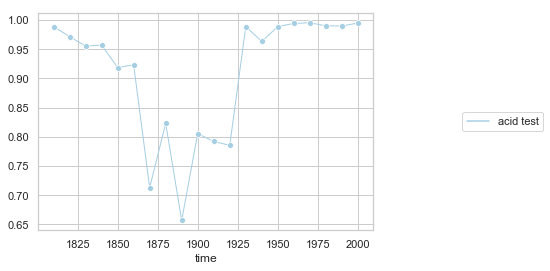

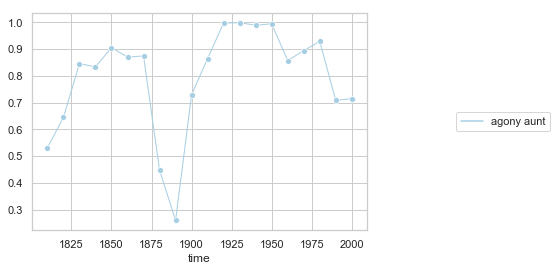

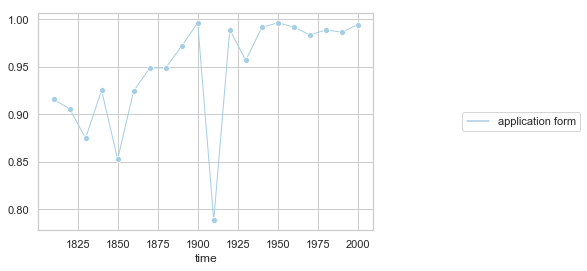

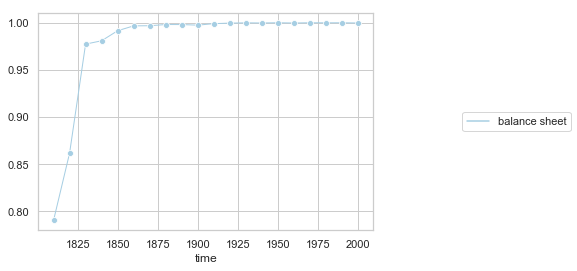

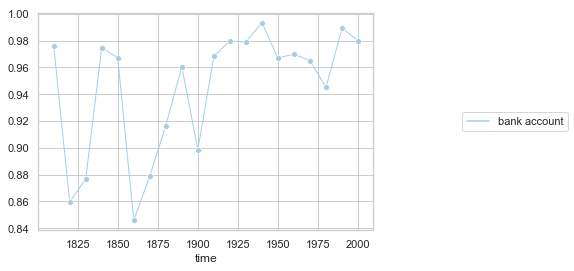

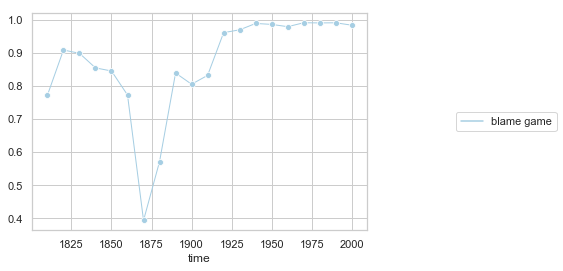

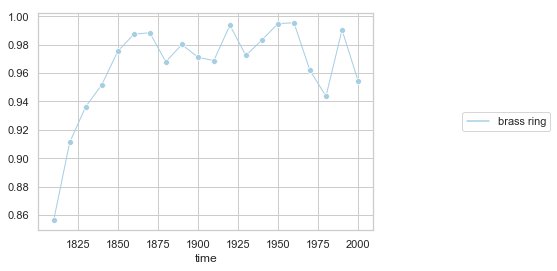

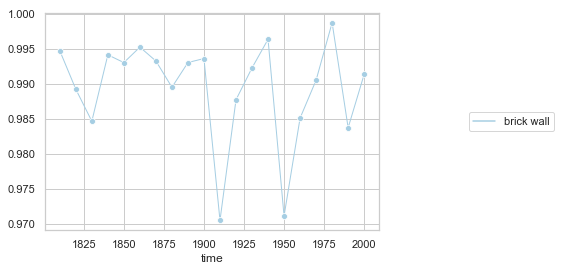

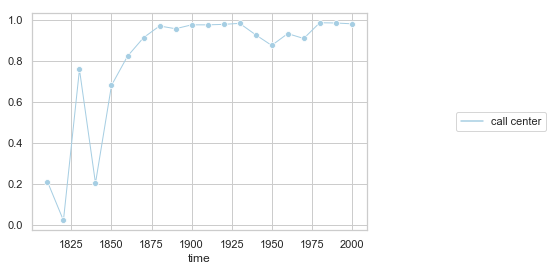

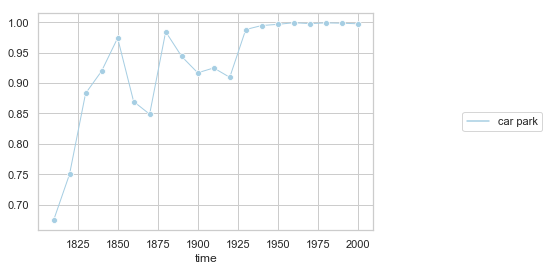

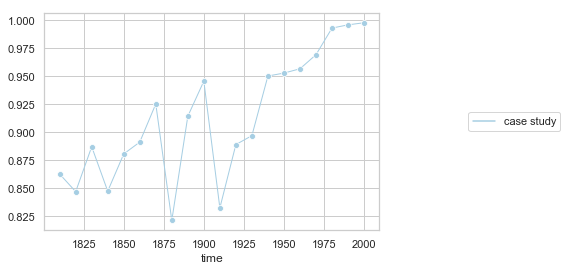

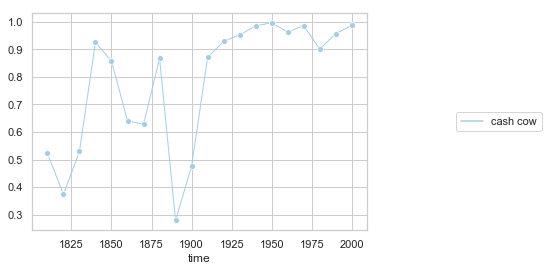

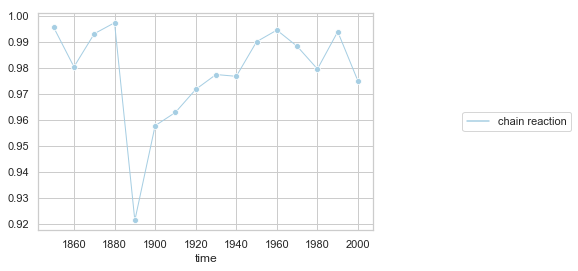

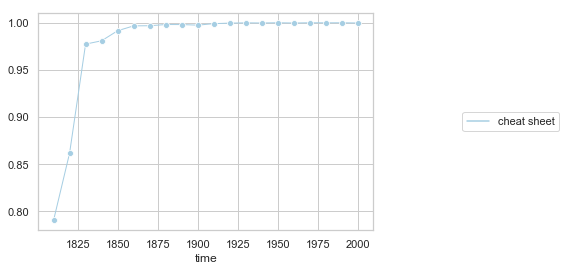

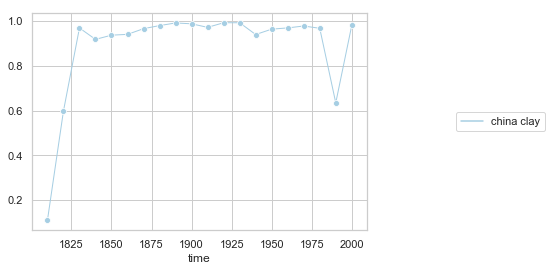

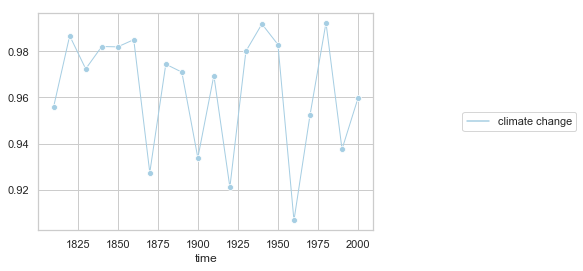

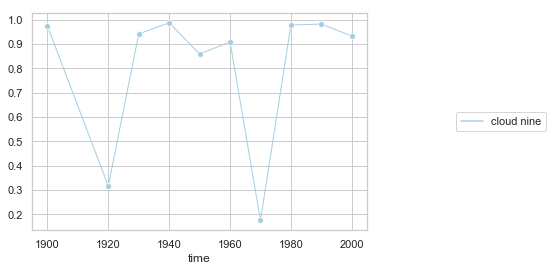

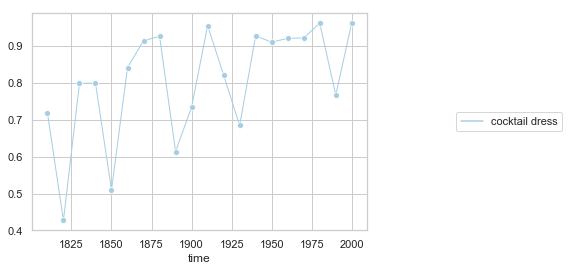

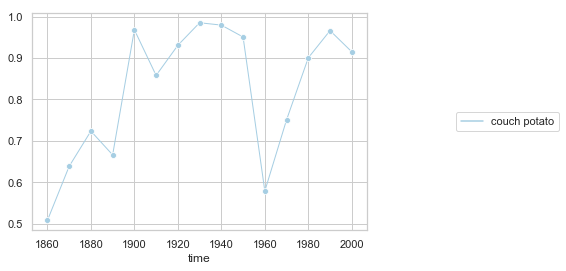

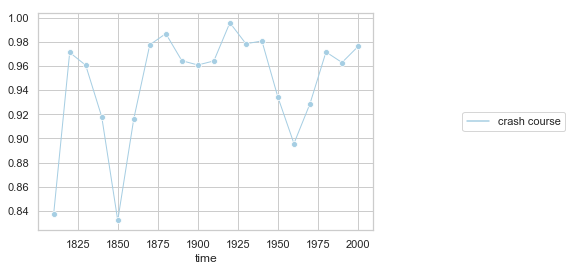

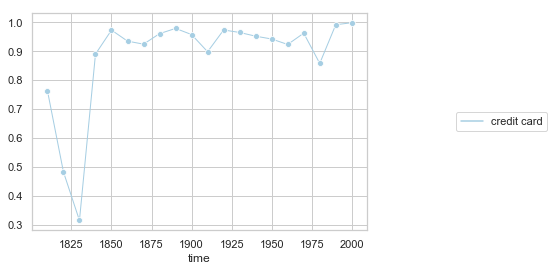

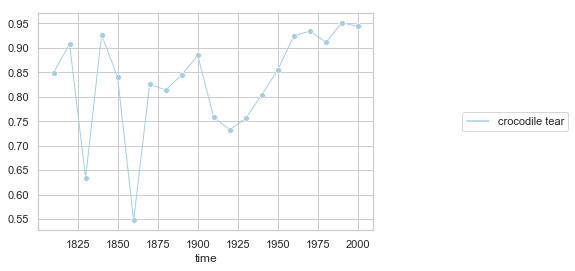

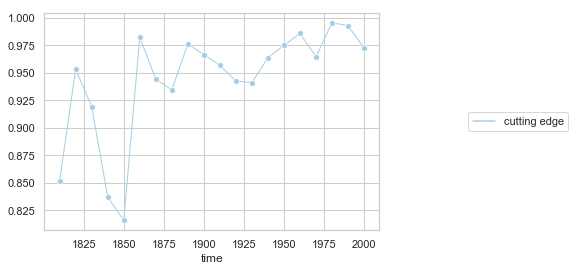

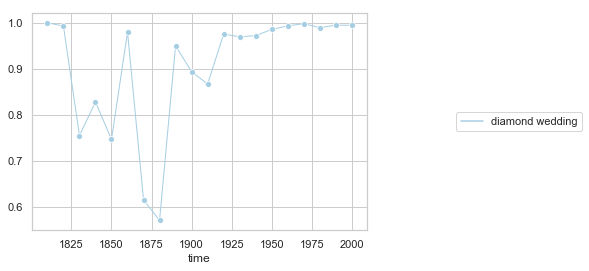

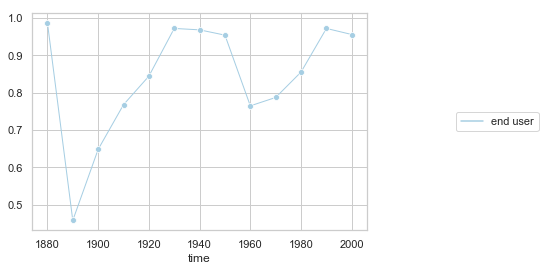

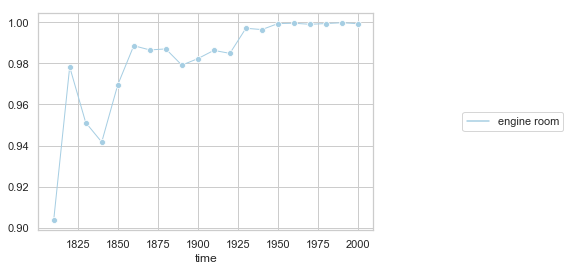

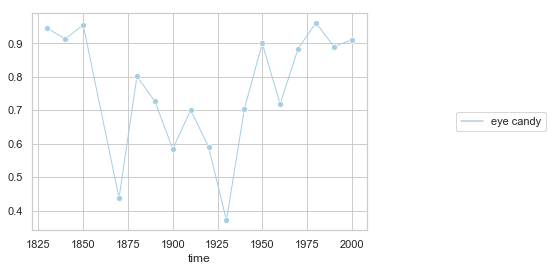

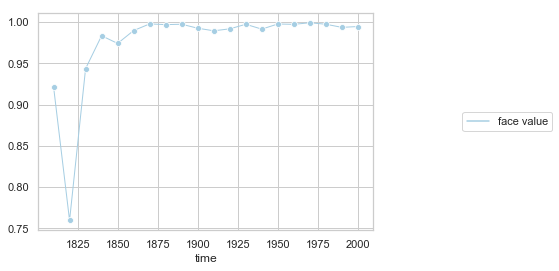

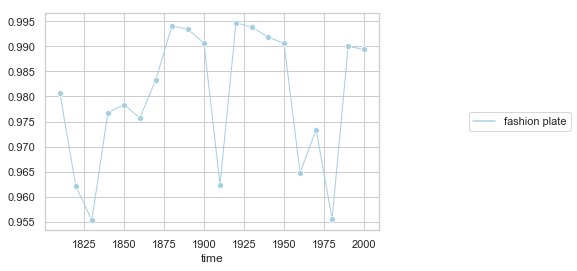

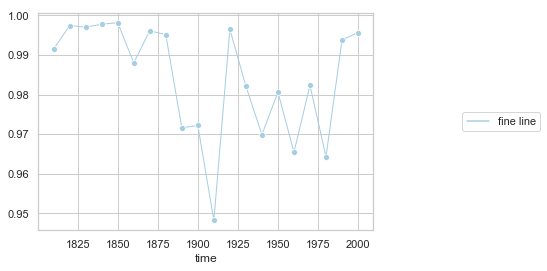

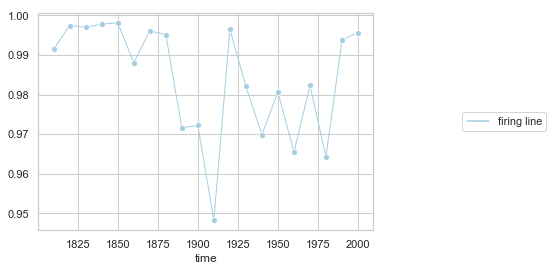

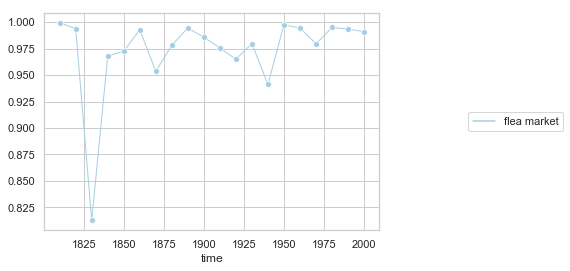

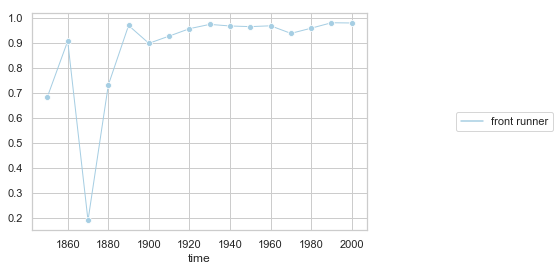

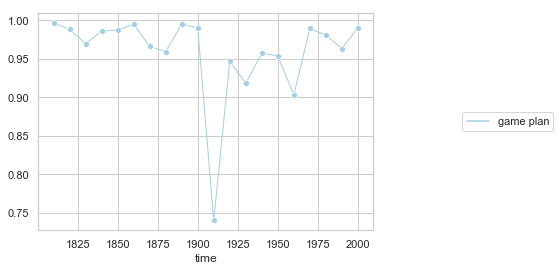

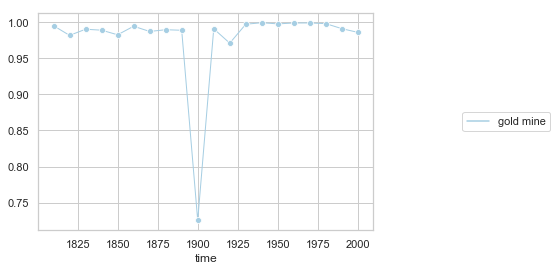

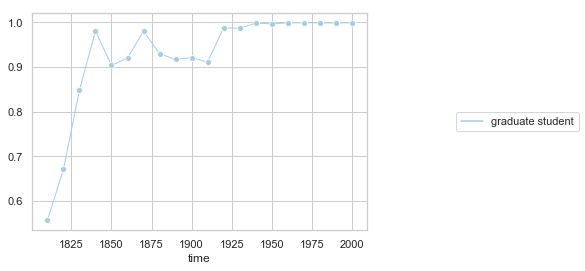

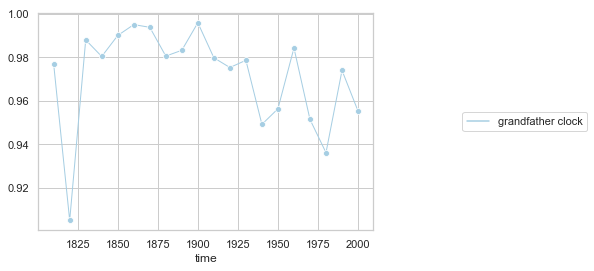

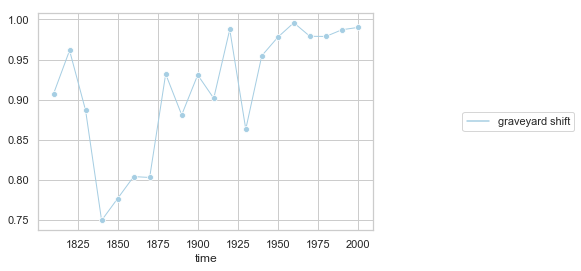

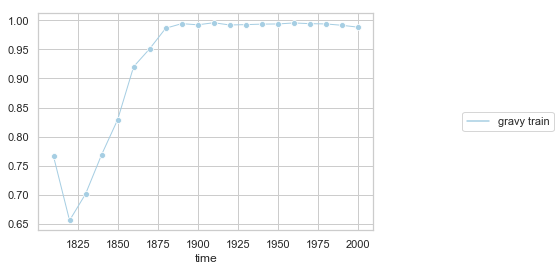

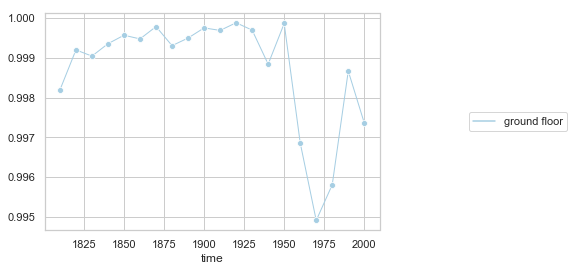

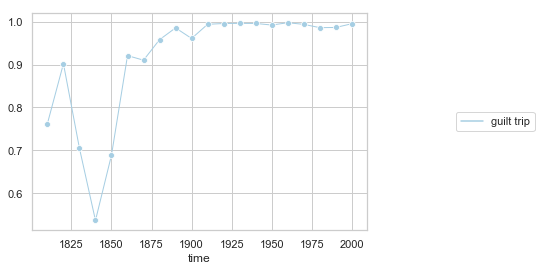

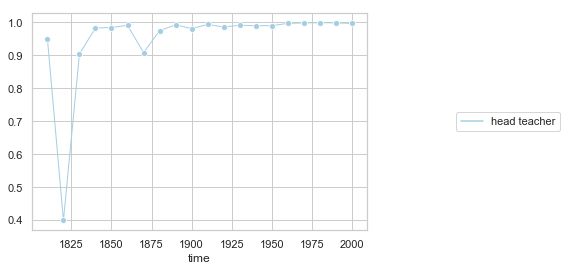

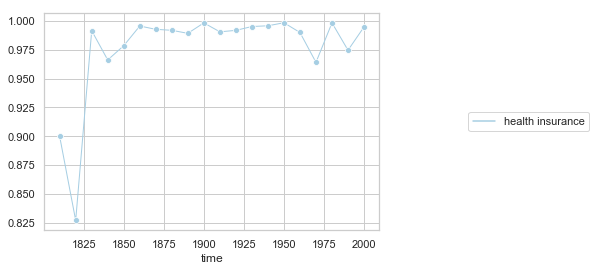

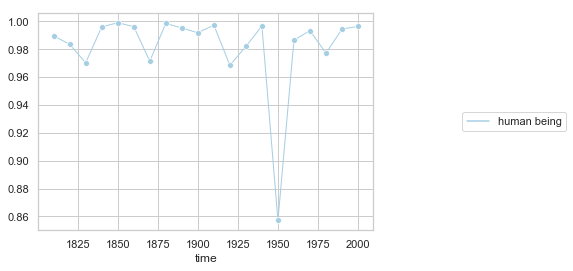

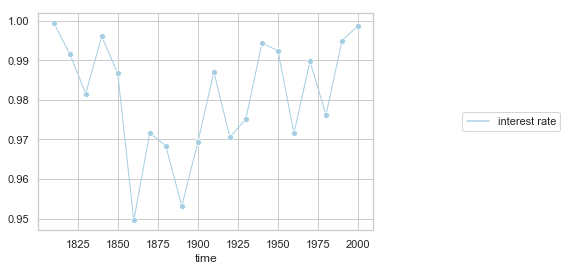

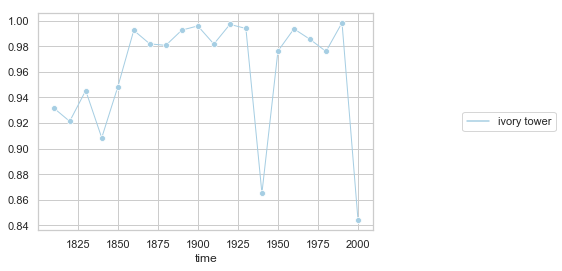

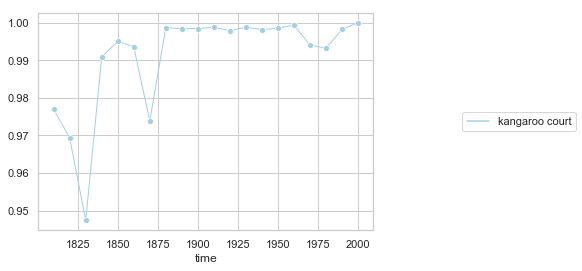

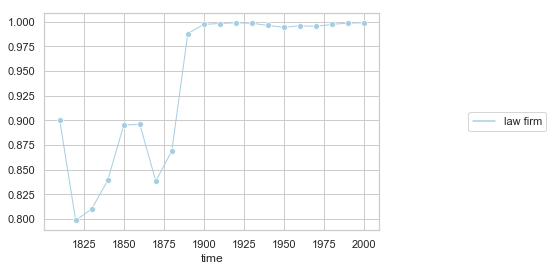

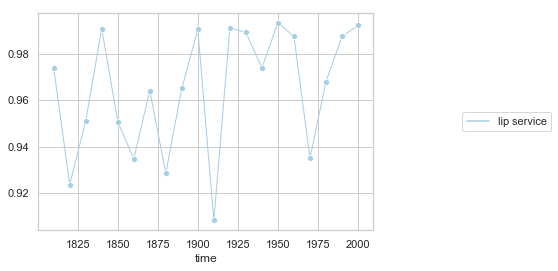

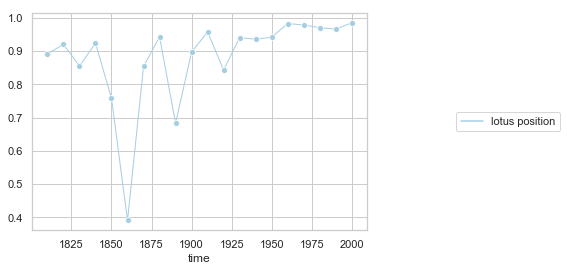

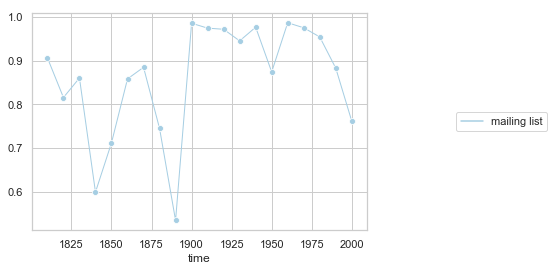

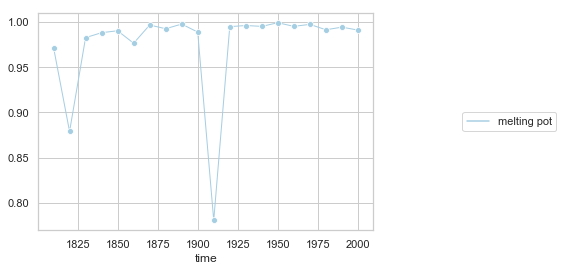

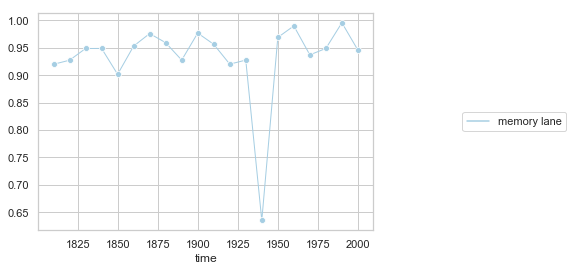

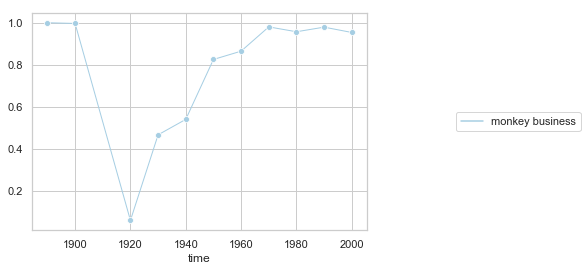

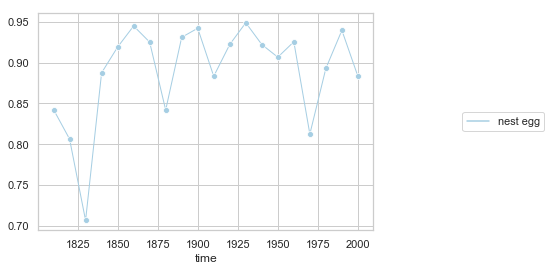

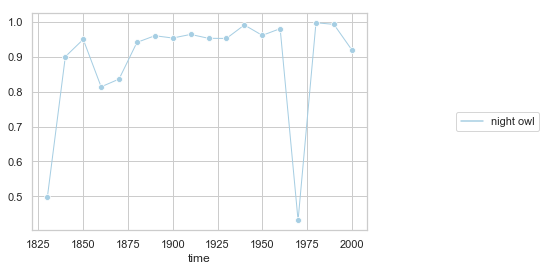

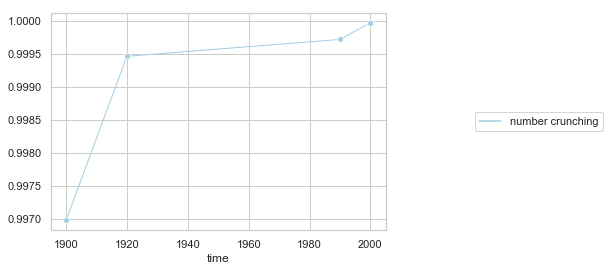

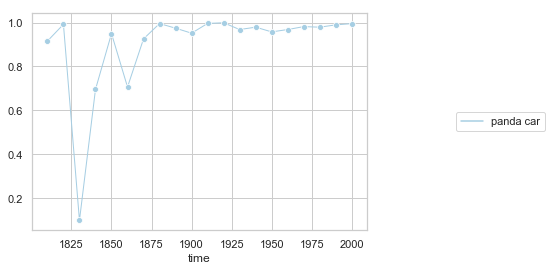

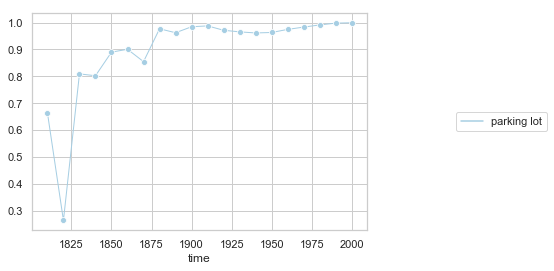

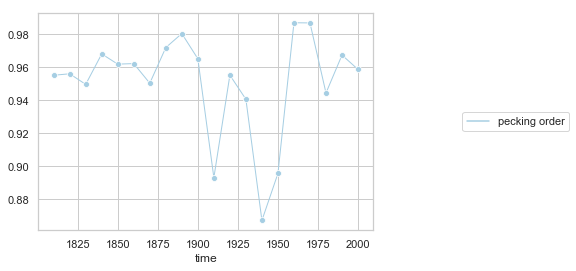

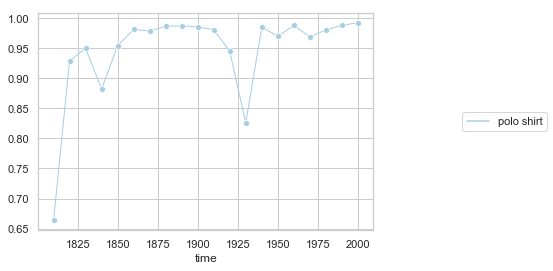

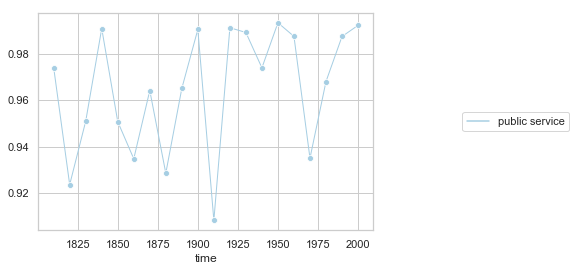

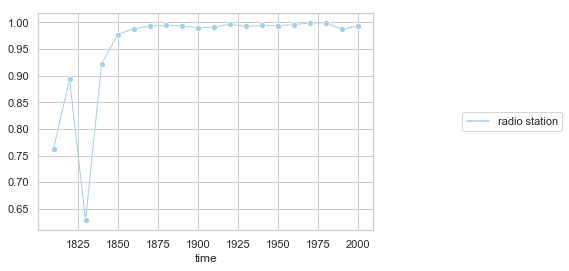

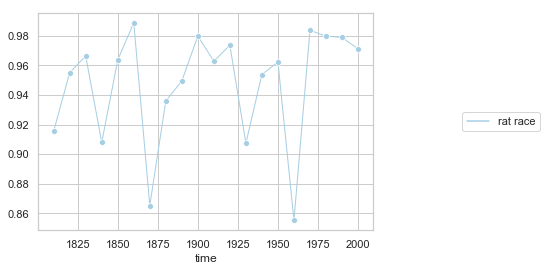

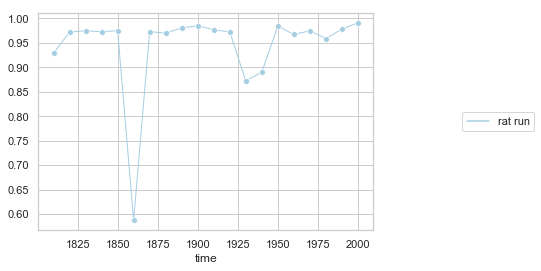

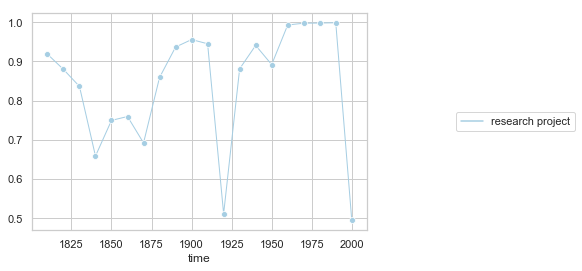

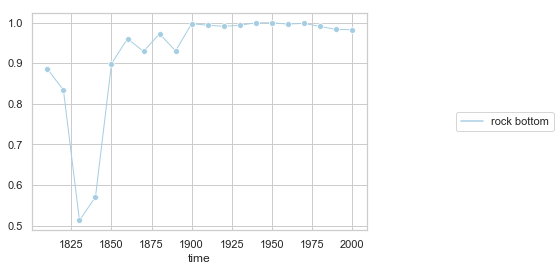

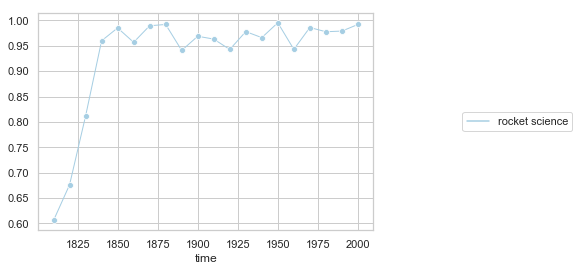

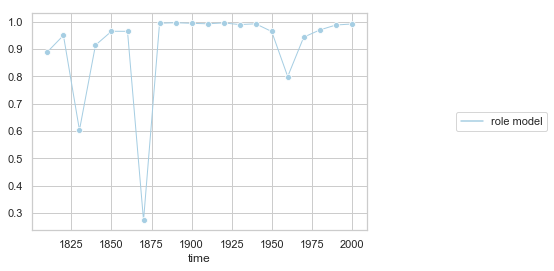

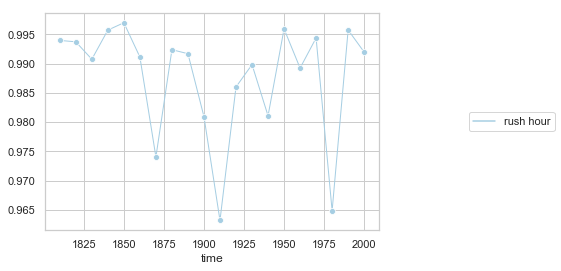

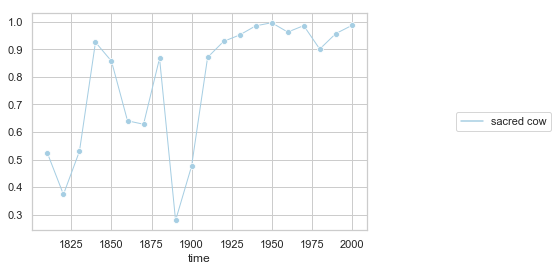

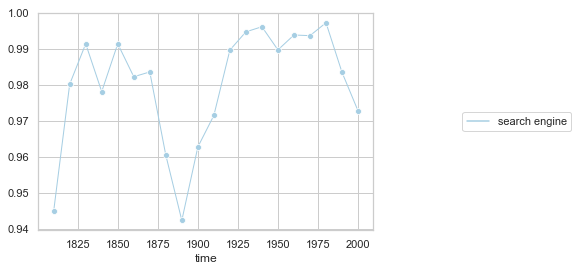

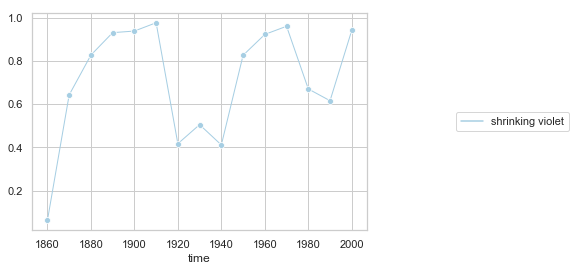

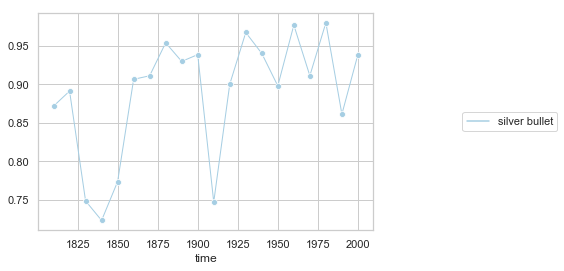

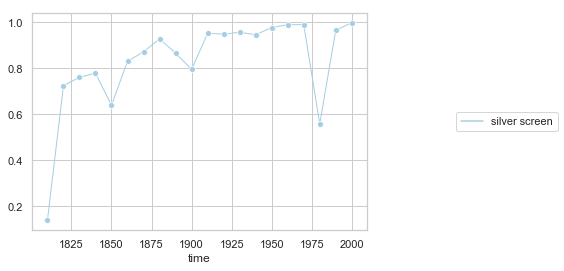

In [93]:
plt.figure(figsize=(10,10))
for i in range(0,75):
    plt.figure()
    g=sns.lineplot(data=plot_head_df.iloc[i].to_frame(), palette="Paired", marker='o',linewidth=1,dashes=False)
    g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))

In [ ]:
plt.figure(figsize=(10,10))
g=sns.lineplot(data=plot_lmi_df.sample(n=10,random_state=1001).transpose(), palette="Paired", marker='o',linewidth=1,dashes=False)
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#g.set(ylim=(-150, 150))